In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import math
#import imageio
from scipy.ndimage.interpolation import map_coordinates
from scipy import signal as sig
from pprint import pprint
import glob
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
from copy import copy
from copy import deepcopy
import seaborn as sns
#from mpl_toolkits.axes_grid1 import make
#_axes_locatable
%matplotlib inline
from scipy import stats
import multiprocessing as mp
import matplotlib.patches as patches

In [2]:
_wbgyr_cdict = {'red': ((0.0,  255./255, 255./255),
                        (0.125, 173./255, 173./255),
                        (0.25,  95./255,  95./255),
                        (0.375, 73./255,  73./255),
                        (0.5,  165./255, 164./255),
                        (0.625, 248./255, 248./255),
                        (0.75, 236./255, 236./255),
                        (0.875, 200./255, 200./255),
                        (1.0,  146./255, 146./255)),
                'green': ((0.0,  255./255, 255./255),
                          (0.125, 224./255, 224./255),
                          (0.25, 163./255, 163./255),
                          (0.375, 166./255, 166./255),
                          (0.5,  207./255, 207./255),
                          (0.625, 184./255, 184./255),
                          (0.75,  86./255,  86./255),
                          (0.875, 29./255,  29./255),
                          (1.0,   21./255,  21./255)),
                'blue': ((0.0,  255./255, 255./255),
                         (0.125, 248./255, 248./255),
                         (0.25, 214./255, 214./255),
                         (0.375, 120./255, 120./255),
                         (0.5,   81./255,  81./255),
                         (0.625, 73./255,  73./255),
                         (0.75,  41./255,  41./255),
                         (0.875, 38./255,  38./255),
                         (1.0,   25./255,  25./255))}
# And reverse
#_wbgyr_cdict_r = copy.deepcopy(_wbgyr_cdict)
#for i in _wbgyr_cdict_r.keys():
#    _wbgyr_cdict_r[i] = [(1-j[0], j[1], j[2]) for j in _wbgyr_cdict_r[i]]
#    _wbgyr_cdict_r[i].reverse()

cmap = LinearSegmentedColormap('WBGYR', _wbgyr_cdict)
cmap.set_bad('#D2D2D2')
plt.register_cmap(cmap=cmap)

#cmap_r = LinearSegmentedColormap('WBGYR', _wbgyr_cdict_r)
##cmap_r.set_bad('#D2D2D2')
#plt.register_cmap(cmap=cmap_r)

In [2]:
dcc_total = np.zeros((2017-1984, 60, 360))
dcc_total[:] = np.nan
#tsc_total = np.zeros((2017-1984, 60, 360))
#tsc_total[:] = np.nan
tsc_total_full = np.zeros((2017-1984, 60, 360))
tsc_total_full[:] = np.nan

count_total = np.zeros((2017-1984))
for i in range (1984,2017,1):


    convdata = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['DCC'][:,60:120]
    #tscdata = xr.open_mfdataset('/disk1/Users/gah20/TSCnew/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
    tscdatafull = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]

    dcc = np.nansum(convdata/convdata,axis=(0))
    #tsc = np.nanmean(tscdata,axis=(0))
    tscfull = np.nanmean(tscdatafull,axis=(0))

    
    dcc_total[i-1984] = dcc
    #tsc_total[i-1984] = tsc
    tsc_total_full[i-1984] = tscfull

    count_total[i-1984] = len(convdata)
    print(i)


1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [3]:
count_total

array([2928., 2920., 2920., 2920., 2928., 2920., 2920., 2920., 2928.,
       2919., 2920., 2920., 2928., 2920., 2920., 2920., 2928., 2920.,
       2920., 2920., 2928., 2920., 2920., 2920., 2928., 2919., 2920.,
       2920., 2928., 2920., 2920., 2920., 2928.])

In [7]:
dcc_total = dcc_total/count_total[:,None,None]

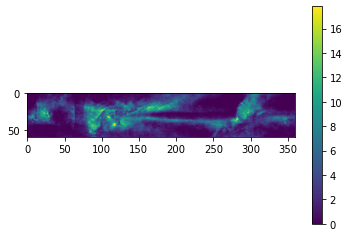

In [14]:
im=plt.imshow(dcc_total[0]*200)
plt.colorbar(im)

In [ ]:
dcc_total = np.zeros((2017-1984, 60, 360))
dcc_total[:] = np.nan
#tsc_total = np.zeros((2017-1984, 60, 360))
#tsc_total[:] = np.nan
tsc_total = np.zeros((2017-1984, 60, 360))
tsc_total[:] = np.nan

yearlyangletotal = np.zeros((2017-1984))
yearlyangletotal[:] = np.nan

count_total = np.zeros((2017-1984))
for i in range (1984,2017,1):


    convdata = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['DCC'][:,60:120]
    tscdata = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]

    dcc = np.nansum(convdata/convdata,axis=(0))
    #tsc = np.nanmean(tscdata,axis=(0))
    tscfull = np.nanmean(tscdata,axis=(0))

    
    dcc_total[i-1984] = dcc
    #tsc_total[i-1984] = tsc
    tsc_total[i-1984] = tscfull

    count_total[i-1984] = len(convdata)
    print(i)

    hxg01 = xr.open_mfdataset('/disk1/Users/gah20/HGX_ISCCP/access/isccp/hxg/'+str(i)+'01/*.nc',combine='nested',concat_dim='time')
    hxg03 = xr.open_mfdataset('/disk1/Users/gah20/HGX_ISCCP/access/isccp/hxg/'+str(i)+'03/*.nc',combine='nested',concat_dim='time')
    hxg06 = xr.open_mfdataset('/disk1/Users/gah20/HGX_ISCCP/access/isccp/hxg/'+str(i)+'06/*.nc',combine='nested',concat_dim='time')
    hxg09 = xr.open_mfdataset('/disk1/Users/gah20/HGX_ISCCP/access/isccp/hxg/'+str(i)+'09/*.nc',combine='nested',concat_dim='time')

    angle_sat01 = 1/hxg01['mue'][:,600:1200]
    angle_sat03 = 1/hxg03['mue'][:,600:1200]
    angle_sat06 = 1/hxg06['mue'][:,600:1200]
    angle_sat09 = 1/hxg09['mue'][:,600:1200]

    meanangle01 = np.nanmean(angle_sat01)
    meanangle03 = np.nanmean(angle_sat03)
    meanangle06 = np.nanmean(angle_sat06)
    meanangle09 = np.nanmean(angle_sat09)

    yearlyangle = (meanangle01+meanangle03+meanangle06+meanangle09)/4
    yearlyangletotal[i-1984] = yearlyangle
    

In [ ]:
yearlymean_tsc = np.zeros(2017-1985)
yearlystd_tsc = np.zeros(2017-1985)
for i in range(1984,2000,1):
    if i == 1998:
        continue
    if i == 1999:
        continue
    #dccdata = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['DCC'][:,60:120]
    tscdata = xr.open_mfdataset('/disk1/Users/gah20/TSCnew/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
    tscdatanew = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
    #dccday = np.zeros(int((len(dccdata)/8)))
    tscday = np.zeros(int((len(tscdata)/24)))
    tscdaynew = np.zeros(int((len(tscdatanew)/24)))
    for j in range(int(len(tscdata)/24)):
        #dccday[j]= np.nansum((dccdata/dccdata)[j*8:j*8 + 8])
        tscday[j]= np.nanmean(tscdata[j*24:j*24 + 24])
        tscdaynew[j] = np.nanmean(tscdatanew[j*24:j*24 + 24])

    yearlymean_tsc[i-1985] = np.nanmean(tscday[:])
    yearlystd_tsc[i-1985] = np.nanstd(tscday[:])

    
   
    print(i)

In [ ]:
for i in range(0,33,1):
    dcc_total[i] = dcc_total[i]/count_total[i]

In [ ]:
sns.set_context('paper')
img_extent = (0, 360, -30, 30)
fig = plt.figure(figsize=(9,7),dpi=500)
gs = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax0.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax0.coastlines(resolution='auto', color='k',linewidth=0.4)

ax1 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k',linewidth=0.4)

ax3 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax3.coastlines(resolution='auto', color='k',linewidth=0.4)

ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax4.coastlines(resolution='auto', color='k',linewidth=0.4)

im=ax0.imshow(np.nanmean(dcc_total*200,axis=(0)),origin='lower',cmap=cmap,extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),aspect='auto')
plt.colorbar(im,ax=ax0,orientation='horizontal',label='Daytime RFO / %')

im1=ax1.imshow(np.nanstd(dcc_total*200,axis=(0)),origin='lower',cmap=cmap,extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),aspect='auto')
plt.colorbar(im1,ax=ax1,orientation='horizontal',label='Interannual Variability / %')

im3=ax3.imshow(np.nanmean(tsc_total,axis=(0)),origin='lower',cmap=cmap,extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),aspect='auto')
plt.colorbar(im3,ax=ax3,orientation='horizontal',label='Mean TSC/ hrs')

im4=ax4.imshow(np.nanstd(tsc_total,axis=(0)) / np.nanmean(tsc_total,axis=(0))* 100,origin='lower',cmap=cmap,extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),aspect='auto')
plt.colorbar(im4,ax=ax4,orientation='horizontal',label='Relative Std Dev TSC/ %')

ax2 = fig.add_subplot(gs[2, :])
ax2.grid(alpha=0.2,linestyle='--')
#ax2.plot(np.nanmean(dcc_total[:,:,:],axis=(1,2))*200,color='skyblue')
ax2.set_xlabel('Year')
ax2.set_xticks(np.arange(0,33,2))
ax2.set_xticklabels(np.arange(1984,2017,2),rotation=45)
ax2.set_ylabel('Daytime RFO / %',color='skyblue')
ax2.set_xlim(0,36)
#ax5 = ax2.twinx()
#ax5.plot(np.nanmean(tsc_total,axis=(1,2)),color='darkorange')
#ax5.set_ylabel('Mean TSC / %',color='darkorange')

#ax5.plot(yearlyangletotal,alpha=1,label='01',color='black')
# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.set_position(("axes", 1.2))
#secax_y2 = ax2.secondary_yaxis(1.15)
#secax_y2.set_ylabel('1/cos(zenith angle)',color='black')

#plt.tight_layout()

twin1 = ax2.twinx()
twin2 = twin1.twinx()


ax2.plot(np.nanmean(dcc_total[:]*200,axis=(1,2)),alpha=1,label='total',color='skyblue')

twin2.plot(np.nanmean(tsc_total_full[:],axis=(1,2)),alpha=1,color='orange')
twin2.set_ylabel('TSC / hrs',color='orange')

twin1.axis('off')
twin1.plot(yearlyangletotal,alpha=1,label='01',color='black')
secax_y2 = twin1.secondary_yaxis(0.889)
secax_y2.set_ylabel('1/cos(zenith angle)',color='black')




plt.tight_layout()
plt.savefig('ClimatologyPlots/DCC_TSC_Climatology.pdf',dpi=900,bbox_inches='tight')

In [ ]:
import pandas as pd
dates = ['Year','DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
with open('/disk1/Users/gah20/meiv2.data.txt') as f:
    df = pd.DataFrame([line.strip().split() for line in f.readlines()][6:39])
    headers = [str(dates[i]) for i in range(0, 13)]
df.columns = headers
df['DJ'] = df['DJ'].astype(float)
for i in headers[1:]:
    df[i] = df[i].astype(float)

In [ ]:

import traceback
start = 0
tsctime = []
dcctime = []
count = []
k=0
month=0
plt.figure(dpi=500)
colors = plt.cm.viridis(np.linspace(0,1,32))
for year in range(1985,2017,1):
    if year == 1998:
        continue
    if year == 1999:
        continue
    try:
        color = colors[k % len(colors)]
        k=k+1
        print(year)
        start = 0
        tsc = xr.open_mfdataset('/disk1/Users/gah20/TSCnew/'+str(year)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
        for i in range(0,12):
            dcc = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(year)+'/'+str(i+1).zfill(2)+'.nc',combine='nested',concat_dim='time')['DCC'][:,60:120]
            dccmonthly = np.nansum(dcc/dcc)
            tscmonthly = np.nanmean(tsc[start*3:(start+len(dcc))*3,:,:])
            start = start + len(dcc)       

            dcctime.append(dccmonthly)
            tsctime.append(tscmonthly)
            count.append(len(dcc))
            #plt.scatter(tscmonthly,dccmonthly,alpha=0.5,color=color,s=5)
            month = month+1
        print(str(year) + ' Done')                               
        #print(str(year) + ' Done')
        #plt.scatter(tscmonthly,dccmonthly,alpha=0.5,color=color,s=5,label=str(year))
    except Exception as e:
        print(e)
plt.xlabel('TSC / hrs')
plt.ylabel('DCC / count')
plt.xlim(150,200)
#plt.ylim(50000)
plt.legend()
#plt.savefig('ENSOSTUDY/TSC_ENSO_scatter.pdf',bbox_inches='tight',dpi=500)
plt.show()

In [ ]:
#for i in range(0,32,1):
plt.figure(dpi=500)
k=0
colors = plt.cm.viridis(np.linspace(0,1,30))
for i in range(0,30,1):
    color = colors[k % len(colors)]
    k=k+1
    dccline = (np.asarray((dcctime[i*12:i*12+12]))/(np.asarray((count[i*12:i*12+12]))*60*360))*200
    tscline = np.asarray(tsctime[i*12:i*12+12])
    
    plt.scatter(tscline,dccline,alpha=0.8,s=5,color=color)

dccline = (np.asarray((dcctime[:]))/(np.asarray((count[:]))*60*360))*200
tscline = np.asarray(tsctime[:])
slope, intercept, r_value, p_value, std_err = stats.linregress(tscline,dccline)
#plt.plot(tscline, intercept + slope*tscline, color='k',alpha=1)
#plt.fill_between(tscline, intercept + slope*tscline - std_err, intercept + slope*tscline + std_err, alpha=1, color='k')
#plt.scatter(dcctime,tsctime)
#plt.legend()
plt.xlabel('TSC / hrs')
plt.ylabel('Mean DCC RFO / %')
plt.xlim(155,210)
plt.colorbar(im,label='Year')
plt.savefig('ClimatologyPlots/DCC_TSC_scatter.pdf',bbox_inches='tight',dpi=900)#

In [ ]:
year = 2000
df[df['Year']==str(year)].to_numpy()[0][12]

In [ ]:
v

In [ ]:
im=plt.imshow(np.random.random((10,10)),vmin=1985,vmax=2017)

In [ ]:
imcb=plt.imshow(np.random.random((10,10)),vmin=1985,vmax=2017)
plt.close()
plt.figure(dpi=500)
k=0
colors = plt.cm.viridis(np.linspace(0,1,30))
for i in range(0,30,1):
    color = colors[k % len(colors)]
    k=k+1
    ensoline = np.asarray((enso_total[i*12:i*12+12]))
    ensolinestrong = np.asarray(enso_strong[i*12:i*12+12])
    tscline = np.asarray(TSC_total[i*12:i*12+12])
    plt.scatter(tscline,ensoline,alpha=0.9,s=5,color=color)
    #plt.scatter(tscline,ensolinestrong,s=5,color=color)

plt.xlabel('TSC / hrs')
plt.ylabel('Mean DCC RFO / %')
plt.xlim(155,210)
plt.colorbar(imcb,label='Year')
plt.savefig('ClimatologyPlots/ENSO_TSC_scatter.pdf',bbox_inches='tight',dpi=900)#

In [ ]:
np.nanmean(p_enso_dcc/p_enso_dcccount)

In [ ]:
plt.figure(dpi=500)
plt.imshow(p_enso_dcc/(p_enso_dcccount),cmap=cmap,origin='lower')
plt.colorbar()


In [ ]:
sns.set_context('paper')
img_extent = (0, 360, -30, 30)
fig = plt.figure(figsize=(4.75,8),dpi=500)
gs = fig.add_gridspec(12, 4)

ax0 = fig.add_subplot(gs[0:2, 0:2], projection=ccrs.PlateCarree(central_longitude=180))
ax0.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax0.coastlines(resolution='auto', color='k',linewidth=0.4)

ax1 = fig.add_subplot(gs[0:2, 2:4], projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k',linewidth=0.4)


im=ax0.imshow(p_enso_dcc/p_enso_dcccount - n_enso_dcc/n_enso_dcccount,origin='lower',cmap='RdBu_r',extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),aspect='auto',vmax=20,vmin=-20)
plt.colorbar(im,ax=ax0,orientation='horizontal',label='pENSO - nENSO \n DCC Difference / %')

im1=ax1.imshow(p_enso_tsc/p_enso_tsccount - n_enso_tsc/n_enso_tsccount,origin='lower',cmap='RdBu_r',extent=img_extent,transform=ccrs.PlateCarree(central_longitude=1),aspect='auto',vmax=100,vmin=-100)
plt.colorbar(im1,ax=ax1,orientation='horizontal',label='pENSO - nENSO \n TSC Difference / hrs')


ax2 = fig.add_subplot(gs[2:5, 0:2])
ax3 = fig.add_subplot(gs[2:5, 2:4])
k=0
colors = plt.cm.viridis(np.linspace(0,1,30))
for i in range(0,30,1):
    color = colors[k % len(colors)]
    k=k+1
    dccline = (np.asarray((dcc_total[i*12:i*12+12]))/(np.asarray((dcc_count[i*12:i*12+12]))*60*360))*200
    ensoline = np.asarray((enso_total[i*12:i*12+12]))
    ensolinestrong = np.asarray(enso_strong[i*12:i*12+12])
    tscline = np.asarray(TSC_total[i*12:i*12+12])
    ax2.scatter(dccline,ensoline,alpha=0.9,s=2,color=color)
    ax3.scatter(tscline,ensoline,alpha=0.9,s=2,color=color)
    ax3.set_xlim(155,210)

    ax2.set_xlabel('Mean DCC RFO / %')
    ax2.set_ylabel('ENSO Index')
    ax3.set_xlabel('TSC / hrs')
    ax3.set_ylabel('ENSO Index')

cbax = fig.add_subplot(gs[5, :])
cbar = plt.colorbar(imcb, cax=cbax, orientation='horizontal',label='Year',aspect=5)
plt.tight_layout()
plt.savefig('ClimatologyPlots/ENSO_DCC_TSC.pdf',dpi=900,bbox_inches='tight')

In [ ]:
enso = []
k=0
tscmonthly = []
for year in range(1984,2017,1):
        k=k+1
        print(year)
        start = 0
        for i in range(0,12):
                enso.append(df[df['Year']==str(year)].to_numpy()[0][i+1])
                #tscmonthly.append(np.nanmean(tsc[start*3:(start+len(dcc))*3]))
        

plt.figure(dpi=500,figsize=(10,3))
plt.bar(np.arange(0,(2017-1984)*12,1),enso,color=np.where(np.asarray(enso) < 0, 'r', 'b'),width=1,alpha=0.5,align='edge')
plt.xlabel('Year')
plt.grid(axis='x')
plt.ylabel('MEI_v2 ENSO Index')
plt.xticks(ticks=np.arange(0,(2017-1984)*12,12),labels=np.arange(1984,2017,1),rotation=45)
plt.xlim(2,(2017-1984)*12)
plt.savefig('ClimatologyPlots/ENSO_timeseries.pdf',dpi=900,bbox_inches='tight')

In [63]:
def CRE_Plot(year):
    import warnings
    print('is it doing?')
    timelen=499
    yedges_net = np.arange(-650,650,1)
    yedges_lw = np.arange(-500,0,1)
    yedges_sw = np.arange(-100,900,1)
    yedges_solar = np.arange(0,1400,5)
    xedges = np.arange(0,timelen+1,1)

    cereshour = 8760
    k=0

    enso_hourly = []
    for month in range(1,13,1):

        if month==2:
            days=28
        else:
            days=31
        if month in (4,9,11,6):
            days=30

        ensoval = df[df['Year']==str(year)].to_numpy()[0][month]
        #print(month)
        #print(days)
        for day in range(1*24,(days+1)*24):
            enso_hourly.append(ensoval)
    print('enso done')
    tsc = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
    landocean = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvOrigin'][:,2:62]
    detinsit = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvCir'][:,2:62]
    print('tsc done')
    isccp = xr.open_mfdataset('/disk1/Data/ISCCP/access/isccp-basic/hgg/'+str(year)+'*/20*.nc',combine='nested',concat_dim='time')
    taupc = isccp['n_pctaudist']
    levtau = isccp['levtau']
    levpc = isccp['levpc']
    tauraw = isccp['tau']
    pcraw = isccp['pc']
    isccptime = isccp['time']
    print('isccp done')
    ds_w = xr.open_mfdataset('/disk1/Data/CERES/CERES_year'+str(year)+'.nc')
    swall = ds_w['toa_sw_all_1h'][:,60:120]
    swclr = ds_w['toa_sw_clr_1h'][:,60:120]
    lwall = ds_w['toa_lw_all_1h'][:,60:120]
    lwclr = ds_w['toa_lw_clr_1h'][:,60:120]

    ds_alb = xr.open_mfdataset('/disk1/Data/CERES/2024_dwld/CERES_year'+str(year)+'.nc')
    solar = ds_alb['toa_solar_all_1h'][:,60:120]
    alb_all = ds_alb['toa_alb_all_1h'][:,60:120]
    alb_clr = ds_alb['toa_alb_clr_1h'][:,60:120]
    timeceres = ds_alb['time'][:]
    print('ceres done')
    #cf = ds_alb['cldarea_total_1h'][:]
    print('all dated loaded in')
    offset = np.argmin(np.abs(isccp['time'][:].values - ds_w['time'][0].values))
    if len(isccp['time'][offset:]) == len(tsc[offset*3:])/3:
        swcldycalc = -(swall[0::3][0:len(isccp['time'][offset:])] - swclr[0::3][0:len(isccp['time'][offset:])])

        meanlw = np.nanmean(lwclr[:],axis=0)
        levels = 4
        lowcldamt = 1

        lowcloudraw = np.nansum(isccp['n_pcdist'][offset:,:levels,60:120],axis=1)
        lowcloud_day = np.where(lowcloudraw<0,np.nan,lowcloudraw)
        print('low cloud done')
        solar_t = solar[0::3][0:len(isccp['time'][offset:])]
        alb_all_t = alb_all[0::3][0:len(isccp['time'][offset:])]
        alb_clr_t = alb_clr[0::3][0:len(isccp['time'][offset:])]
        print('doing albedos now')
        alb_all_t_sm = np.where(solar_t<700,np.nan,alb_all_t) 
        alb_clr_t_sm = np.where(solar_t<700,np.nan,alb_clr_t)
        solar_t_sm = np.where(solar_t<700,np.nan,solar_t)

        low_alb = np.where(lowcloud_day[:]<1,alb_all_t_sm - alb_clr_t_sm,np.nan)
        bkg_alb = np.where(lowcloud_day[:]<1,alb_all_t_sm,np.nan)

        alb_high_low = alb_all_t - (alb_clr_t + np.nanmean(low_alb,axis=0))
        alb_high_low = np.where(np.isnan(alb_high_low),0,alb_high_low)
        alb_high_bkg = alb_all_t - np.nanmean(bkg_alb,axis=0)
        alb_high_bkg = np.where(np.isnan(alb_high_bkg),0,alb_high_bkg)
        print('albedos done')
        lwclr_f = np.where(np.isnan(lwclr[0::3][0:len(isccp['time'][offset:])]),meanlw,lwclr[0::3][0:len(isccp['time'][offset:])])
        lwcldy = (lwall[0::3][0:len(isccp['time'][offset:])] - lwclr_f) 
        swcldy = solar_t*alb_high_low
        swcldy_bkg = solar_t*alb_high_bkg

        swcldyzerobkg = np.where(swcldy_bkg<0,0,swcldy_bkg)
        swcldyzeroall = np.where(swcldy<0,0,swcldy)

        tsc_t = (np.asarray(tsc[offset*3::3]))
        tsc_d = np.asarray(np.where(detinsit[offset*3::3]>=0,tsc[offset*3::3],np.nan))
        tsc_i = np.asarray(np.where(np.isnan(tsc_d),tsc[offset*3::3],np.nan))
        tsc_o = np.asarray(np.where(landocean[offset*3::3]<0,tsc[offset*3::3],np.nan))
        tsc_l = np.asarray(np.where(landocean[offset*3::3]>0,tsc[offset*3::3],np.nan))

        tsc_o_d = np.asarray(np.where(landocean[offset*3::3]<0,tsc_d,np.nan))
        tsc_o_i = np.asarray(np.where(landocean[offset*3::3]<0,tsc_i,np.nan))

        tsc_l_d = np.asarray(np.where(landocean[offset*3::3]>0,tsc_d,np.nan))
        tsc_l_i = np.asarray(np.where(landocean[offset*3::3]>0,tsc_i,np.nan))

        enso_offset = np.asarray(enso_hourly[offset*3::3])
        print('starting histograms')
        H_lw, xedges, yedges_lw = np.histogram2d(tsc_t.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw)) 
        H_sw, xedges, yedges_sw = np.histogram2d(tsc_t.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_penso, xedges, yedges_lw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])>0.5)[0]].flatten(),np.asarray(lwcldy[np.where(np.asarray(enso_offset[:])>0.5)[0]]).flatten(), bins=(xedges,yedges_lw))
        H_sw_penso, xedges, yedges_sw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])>0.5)[0]].flatten(),np.asarray(swcldyzerobkg[np.where(np.asarray(enso_offset[:])>0.5)[0]]).flatten(), bins=(xedges,yedges_sw))

        H_lw_nenso, xedges, yedges_lw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])<-0.5)[0]].flatten(),np.asarray(lwcldy[np.where(np.asarray(enso_offset[:])<-0.5)[0]]).flatten(), bins=(xedges,yedges_lw))
        H_sw_nenso, xedges, yedges_sw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])<-0.5)[0]].flatten(),np.asarray(swcldyzerobkg[np.where(np.asarray(enso_offset[:])<-0.5)[0]]).flatten(), bins=(xedges,yedges_sw))

        H_sw_det, xedges, yedges_sw = np.histogram2d(tsc_d.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))
        H_sw_ins, xedges, yedges_sw = np.histogram2d(tsc_i.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_det, xedges, yedges_lw = np.histogram2d(tsc_d.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_lw_ins, xedges, yedges_lw = np.histogram2d(tsc_i.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))

        H_lw_l, xedges, yedges_lw = np.histogram2d(tsc_l.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_sw_l, xedges, yedges_sw = np.histogram2d(tsc_l.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_o, xedges, yedges_lw = np.histogram2d(tsc_o.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_sw_o, xedges, yedges_sw = np.histogram2d(tsc_o.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_o_det, xedges, yedges_lw = np.histogram2d(tsc_o_d.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_lw_o_ins, xedges, yedges_lw = np.histogram2d(tsc_o_i.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))

        H_lw_l_det, xedges, yedges_lw = np.histogram2d(tsc_l_d.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_lw_l_ins, xedges, yedges_lw = np.histogram2d(tsc_l_i.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))

        H_sw_o_det, xedges, yedges_sw = np.histogram2d(tsc_o_d.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))
        H_sw_o_ins, xedges, yedges_sw = np.histogram2d(tsc_o_i.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_sw_l_det, xedges, yedges_sw = np.histogram2d(tsc_l_d.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))
        H_sw_l_ins, xedges, yedges_sw = np.histogram2d(tsc_l_i.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        timelen=499

        H_norm_lw_all = np.zeros((timelen,499))
        H_norm_sw_all = np.zeros((timelen,999))

        H_norm_lw_penso = np.zeros((timelen,499))
        H_norm_sw_penso = np.zeros((timelen,999))

        H_norm_lw_nenso = np.zeros((timelen,499))
        H_norm_sw_nenso = np.zeros((timelen,999))

        H_norm_lw_o = np.zeros((timelen,499))
        H_norm_sw_o = np.zeros((timelen,999))

        H_norm_lw_l = np.zeros((timelen,499))
        H_norm_sw_l = np.zeros((timelen,999))

        H_norm_sw_det = np.zeros((timelen,999))
        H_norm_sw_ins = np.zeros((timelen,999))

        H_norm_lw_det = np.zeros((timelen,499))
        H_norm_lw_ins = np.zeros((timelen,499))

        H_norm_lw_o_det = np.zeros((timelen,499))
        H_norm_lw_o_ins = np.zeros((timelen,499))

        H_norm_lw_l_det = np.zeros((timelen,499))
        H_norm_lw_l_ins = np.zeros((timelen,499))

        H_norm_sw_o_det = np.zeros((timelen,999))
        H_norm_sw_o_ins = np.zeros((timelen,999))

        H_norm_sw_l_det = np.zeros((timelen,999))
        H_norm_sw_l_ins = np.zeros((timelen,999))



        for i in range(timelen):

            H_norm_lw_all[i] = H_lw[i] / np.sum(H_lw[i])
            H_norm_sw_all[i] = H_sw[i] / np.sum(H_sw[i])

            H_norm_lw_penso[i] = H_lw_penso[i] / np.sum(H_lw_penso[i])
            H_norm_sw_penso[i] = H_sw_penso[i] / np.sum(H_sw_penso[i])

            H_norm_lw_nenso[i] = H_lw_nenso[i] / np.sum(H_lw_nenso[i])
            H_norm_sw_nenso[i] = H_sw_nenso[i] / np.sum(H_sw_nenso[i])

            H_norm_lw_o[i] = H_lw_o[i] / np.sum(H_lw_o[i])
            H_norm_sw_o[i] = H_sw_o[i] / np.sum(H_sw_o[i])

            H_norm_lw_l[i] = H_lw_l[i] / np.sum(H_lw_l[i])
            H_norm_sw_l[i] = H_sw_l[i] / np.sum(H_sw_l[i])

            H_norm_sw_det[i] = H_sw_det[i] / np.sum(H_sw_det[i])
            H_norm_sw_ins[i] = H_sw_ins[i] / np.sum(H_sw_ins[i])

            H_norm_lw_det[i] = H_lw_det[i] / np.sum(H_lw_det[i])
            H_norm_lw_ins[i] = H_lw_ins[i] / np.sum(H_lw_ins[i])

            H_norm_lw_o_det[i] = H_lw_o_det[i] / np.sum(H_lw_o_det[i])
            H_norm_lw_o_ins[i] = H_lw_o_ins[i] / np.sum(H_lw_o_ins[i])

            H_norm_lw_l_det[i] = H_lw_l_det[i] / np.sum(H_lw_l_det[i])
            H_norm_lw_l_ins[i] = H_lw_l_ins[i] / np.sum(H_lw_l_ins[i])

            H_norm_sw_o_det[i] = H_sw_o_det[i] / np.sum(H_sw_o_det[i])
            H_norm_sw_o_ins[i] = H_sw_o_ins[i] / np.sum(H_sw_o_ins[i])

            H_norm_sw_l_det[i] = H_sw_l_det[i] / np.sum(H_sw_l_det[i])
            H_norm_sw_l_ins[i] = H_sw_l_ins[i] / np.sum(H_sw_l_ins[i])

        LW_AVERAGE_all = np.zeros((timelen))
        SW_AVERAGE_all = np.zeros((timelen))

        LW_AVERAGE_penso = np.zeros((timelen))
        SW_AVERAGE_penso = np.zeros((timelen))

        LW_AVERAGE_nenso = np.zeros((timelen))
        SW_AVERAGE_nenso = np.zeros((timelen))

        LW_AVERAGE_o = np.zeros((timelen))
        SW_AVERAGE_o = np.zeros((timelen))

        LW_AVERAGE_l = np.zeros((timelen))
        SW_AVERAGE_l = np.zeros((timelen))


        SW_AVERAGE_det = np.zeros((timelen))
        SW_AVERAGE_ins = np.zeros((timelen))

        LW_AVERAGE_det = np.zeros((timelen))
        LW_AVERAGE_ins = np.zeros((timelen))

        LW_AVERAGE_o_det = np.zeros((timelen))
        LW_AVERAGE_o_ins = np.zeros((timelen))

        LW_AVERAGE_l_det = np.zeros((timelen))
        LW_AVERAGE_l_ins = np.zeros((timelen))

        SW_AVERAGE_o_det = np.zeros((timelen))
        SW_AVERAGE_o_ins = np.zeros((timelen))

        SW_AVERAGE_l_det = np.zeros((timelen))
        SW_AVERAGE_l_ins = np.zeros((timelen))

        for i in range(timelen):

            LW_AVERAGE_all[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_all[i])
            SW_AVERAGE_all[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_all[i])

            LW_AVERAGE_penso[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_penso[i])
            SW_AVERAGE_penso[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_penso[i])

            LW_AVERAGE_nenso[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_nenso[i])
            SW_AVERAGE_nenso[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_nenso[i])

            LW_AVERAGE_o[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_o[i])
            SW_AVERAGE_o[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_o[i])

            LW_AVERAGE_l[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_l[i])
            SW_AVERAGE_l[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_l[i])

            SW_AVERAGE_det[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_det[i])
            SW_AVERAGE_ins[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_ins[i])

            LW_AVERAGE_det[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_det[i])
            LW_AVERAGE_ins[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_ins[i])

            LW_AVERAGE_o_det[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_o_det[i])
            LW_AVERAGE_o_ins[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_o_ins[i])

            LW_AVERAGE_l_det[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_l_det[i])
            LW_AVERAGE_l_ins[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_l_ins[i])

            SW_AVERAGE_o_det[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_o_det[i])
            SW_AVERAGE_o_ins[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_o_ins[i])

            SW_AVERAGE_l_det[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_l_det[i])
            SW_AVERAGE_l_ins[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_l_ins[i]) 
            
        print('averages done')

        counts = np.histogram(np.asarray(tsc_t).flatten(),bins=np.arange(0,500,1))[0]
        counts_det = np.histogram(np.asarray(tsc_d).flatten(),bins=np.arange(0,500,1))[0]
        counts_ins = np.histogram(np.asarray(tsc_i).flatten(),bins=np.arange(0,500,1))[0]


        counts_o = np.histogram(np.asarray(tsc_o).flatten(),bins=np.arange(0,500,1))[0]
        counts_l = np.histogram(np.asarray(tsc_l).flatten(),bins=np.arange(0,500,1))[0]

        counts_det_o = np.histogram(np.asarray(tsc_o_d).flatten(),bins=np.arange(0,500,1))[0]
        counts_ins_o = np.histogram(np.asarray(tsc_o_i).flatten(),bins=np.arange(0,500,1))[0]

        counts_det_l = np.histogram(np.asarray(tsc_l_d).flatten(),bins=np.arange(0,500,1))[0]
        counts_ins_l = np.histogram(np.asarray(tsc_l_i).flatten(),bins=np.arange(0,500,1))[0]

        weightedlw = (LW_AVERAGE_det * (counts_det / counts)) + (LW_AVERAGE_ins * (counts_ins/counts))
        weightedsw = (SW_AVERAGE_det * (counts_det / counts)) + (SW_AVERAGE_ins * (counts_ins/counts))

        weightedlw_o = (LW_AVERAGE_o_det * (counts_det_o / counts_o)) + (LW_AVERAGE_o_ins * (counts_ins_o/counts_o))
        weightedsw_o = (SW_AVERAGE_o_det * (counts_det_o / counts_o)) + (SW_AVERAGE_o_ins * (counts_ins_o/counts_o))

        weightedlw_l = (LW_AVERAGE_l_det * (counts_det_l / counts_l)) + (LW_AVERAGE_l_ins * (counts_ins_l/counts_l))
        weightedsw_l = (SW_AVERAGE_l_det * (counts_det_l / counts_l)) + (SW_AVERAGE_l_ins * (counts_ins_l/counts_l))

        weightedlw = np.where(np.isnan(weightedlw),LW_AVERAGE_all,weightedlw)
        weightedsw = np.where(np.isnan(weightedsw),SW_AVERAGE_all,weightedsw)

        weightedlw_o = np.where(np.isnan(weightedlw_o),LW_AVERAGE_o,weightedlw_o)
        weightedsw_o = np.where(np.isnan(weightedsw_o),SW_AVERAGE_o,weightedsw_o)

        weightedlw_l = np.where(np.isnan(weightedlw_l),LW_AVERAGE_l,weightedlw_l)
        weightedsw_l = np.where(np.isnan(weightedsw_l),SW_AVERAGE_l,weightedsw_l)

        lwsum = np.nansum(weightedlw[:]*(counts[:]))/np.nansum(counts[:])
        swsum = np.nansum(weightedsw[:]*(counts[:]))/np.nansum(counts[:])

        lwsum_o = np.nansum(weightedlw_o[:]*(counts_o[:]))/np.nansum(counts_o[:])
        swsum_o = np.nansum(weightedsw_o[:]*(counts_o[:]))/np.nansum(counts_o[:])

        lwsum_l = np.nansum(weightedlw_l[:]*(counts_l[:]))/np.nansum(counts_l[:])
        swsum_l = np.nansum(weightedsw_l[:]*(counts_l[:]))/np.nansum(counts_l[:])


        totalforcing = lwsum+swsum

        totalforcing_o = lwsum_o+swsum_o

        totalforcing_l = lwsum_l+swsum_l

        totalforcing = []
        totalforcing_land = []
        totalforcing_ocean = []

        totalextcounts = np.zeros((100,499))
        totalextcounts_det = np.zeros((100,499))
        totalextcounts_ins = np.zeros((100,499))

        totalextcounts_o = np.zeros((100,499))
        totalextcounts_l = np.zeros((100,499))
        totalextcounts_o_d = np.zeros((100,499))
        totalextcounts_l_d = np.zeros((100,499))
        totalextcounts_o_i =  np.zeros((100,499))
        totalextcounts_l_i = np.zeros((100,499))

        for i in range(100,200):
            xloc = (np.arange(len(counts_det)))
            newsize = int((len(counts_det)*(i/100)))
            new_xloc = np.linspace(0, len(counts_det), newsize)
            extcounts_det = np.interp(new_xloc, xloc, counts_det)
            extcounts_ins = np.interp(new_xloc, xloc, counts_ins)
            extcounts = np.interp(new_xloc, xloc, counts)

            extcounts_o = np.interp(new_xloc, xloc, counts_o)
            extcounts_l = np.interp(new_xloc, xloc, counts_l)
            extcounts_o_d = np.interp(new_xloc, xloc, counts_det_o)
            extcounts_l_d = np.interp(new_xloc, xloc, counts_det_l)
            extcounts_o_i = np.interp(new_xloc, xloc, counts_ins_o)
            extcounts_l_i = np.interp(new_xloc, xloc, counts_ins_l)


            weightedlw = (LW_AVERAGE_det * (extcounts_det[0:499] / extcounts[0:499])) + (LW_AVERAGE_ins * (extcounts_ins[0:499]/extcounts[0:499]))
            weightedsw = (SW_AVERAGE_det * (extcounts_det[0:499] / extcounts[0:499])) + (SW_AVERAGE_ins * (extcounts_ins[0:499]/extcounts[0:499]))

            weightedlw_l = (LW_AVERAGE_l_det * (extcounts_l_d[0:499] / extcounts_l[0:499])) + (LW_AVERAGE_l_ins * (extcounts_l_i[0:499]/extcounts_l[0:499]))
            weightedsw_l = (SW_AVERAGE_l_det * (extcounts_l_d[0:499] / extcounts_l[0:499])) + (SW_AVERAGE_l_ins * (extcounts_l_i[0:499]/extcounts_l[0:499]))

            weightedlw_l = np.where(np.isnan(weightedlw_l),LW_AVERAGE_l,weightedlw_l)
            weightedsw_l = np.where(np.isnan(weightedsw_l),SW_AVERAGE_l,weightedsw_l)

            weightedlw_o = (LW_AVERAGE_o_det * (extcounts_o_d[0:499] / extcounts_o[0:499])) + (LW_AVERAGE_o_ins * (extcounts_o_i[0:499]/extcounts_o[0:499]))
            weightedsw_o = (SW_AVERAGE_o_det * (extcounts_o_d[0:499] / extcounts_o[0:499])) + (SW_AVERAGE_o_ins * (extcounts_o_i[0:499]/extcounts_o[0:499]))

            weightedlw_o = np.where(np.isnan(weightedlw_o),LW_AVERAGE_o,weightedlw_o)
            weightedsw_o = np.where(np.isnan(weightedsw_o),SW_AVERAGE_o,weightedsw_o)

            weightedlw = np.where(np.isnan(weightedlw),LW_AVERAGE_all,weightedlw)
            weightedsw = np.where(np.isnan(weightedsw),SW_AVERAGE_all,weightedsw)

            if i==100:
                weightedlw0 = weightedlw
                weightedsw0 = weightedsw
                extcounts0 = extcounts
            if i==125:
                weightedlw1 = weightedlw
                weightedsw1 = weightedsw
                extcounts1 = extcounts
            if i==199:
                weightedlw2 = weightedlw
                weightedsw2 = weightedsw
                extcounts2 = extcounts
            
                #plt.plot(SW_AVERAGE_l_det * (extcounts_l_d[0:499] / extcounts_l[0:499]))
                #plt.plot((SW_AVERAGE_l_ins * (extcounts_l_i[0:499]/extcounts_l[0:499])) + SW_AVERAGE_l_det * (extcounts_l_d[0:499] / extcounts_l[0:499]) + (LW_AVERAGE_l_ins * (extcounts_l_i[0:499]/extcounts_l[0:499])) + LW_AVERAGE_l_det * (extcounts_l_d[0:499] / extcounts_l[0:499]))

            
            lwsum = np.nansum(weightedlw[:]*(counts[0:499]))/np.nansum(counts[0:499])
            swsum = np.nansum(weightedsw[:]*(counts[0:499]))/np.nansum(counts[0:499])

            lwsum_o = np.nansum(weightedlw_o[:]*(counts_o[0:499]))/np.nansum(counts_o[0:499])
            swsum_o = np.nansum(weightedsw_o[:]*(counts_o[0:499]))/np.nansum(counts_o[0:499])

            lwsum_l = np.nansum(weightedlw_l[:]*(counts_l[0:499]))/np.nansum(counts_l[0:499])
            swsum_l = np.nansum(weightedsw_l[:]*(counts_l[0:499]))/np.nansum(counts_l[0:499])

            
            totalforcing.append(lwsum+swsum)
            totalforcing_ocean.append(lwsum_o+swsum_o)
            totalforcing_land.append(lwsum_l+swsum_l)


            totalextcounts[i - 100] = extcounts[0:499]
            totalextcounts_det[i - 100] = extcounts_det[0:499]
            totalextcounts_ins[i - 100] = extcounts_ins[0:499]

            totalextcounts_o[i - 100] = extcounts_o_d[0:499]
            totalextcounts_l[i - 100] = extcounts_l_d[0:499]
            totalextcounts_o_d[i - 100] = extcounts_o_d[0:499]
            totalextcounts_l_d[i - 100] = extcounts_l_d[0:499]
            totalextcounts_o_i[i - 100] = extcounts_o_i[0:499]
            totalextcounts_l_i[i - 100] = extcounts_l_i[0:499]
        return totalforcing
        #return LW_AVERAGE_penso,SW_AVERAGE_penso,LW_AVERAGE_nenso,SW_AVERAGE_nenso
    else:
        print('not same length, returning nans')
        a = np.empty(499)
        a[:] = np.nan
        return a
        #return a,a

In [3]:
def CRE_Plot_total(year):
    import warnings
    print('is it doing?')
    timelen=499
    yedges_net = np.arange(-650,650,1)
    yedges_lw = np.arange(-500,0,1)
    yedges_sw = np.arange(-100,900,1)
    yedges_solar = np.arange(0,1400,5)
    xedges = np.arange(0,timelen+1,1)

    cereshour = 8760
    k=0

    enso_hourly = []
    for month in range(1,13,1):

        if month==2:
            days=28
        else:
            days=31
        if month in (4,9,11,6):
            days=30

        ensoval = df[df['Year']==str(year)].to_numpy()[0][month]
        #print(month)
        #print(days)
        for day in range(1*24,(days+1)*24):
            enso_hourly.append(ensoval)
    print('enso done')
    tsc = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62][:2918*3]
    landocean = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvOrigin'][:,2:62][:2918*3]
    detinsit = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(year)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvCir'][:,2:62][:2918*3]
    print('tsc done')
    isccp = xr.open_mfdataset('/disk1/Data/ISCCP/access/isccp-basic/hgg/'+str(year)+'*/20*.nc',combine='nested',concat_dim='time')
    
    taupc = isccp['n_pctaudist'][:2918]
    npcdist = isccp['n_pcdist'][:2918]
    levtau = isccp['levtau'][:2918]
    levpc = isccp['levpc'][:2918]
    tauraw = isccp['tau'][:2918]
    pcraw = isccp['pc'][:2918]
    isccptime = isccp['time'][:2918]
    print('isccp done')

    ds_w = xr.open_mfdataset('/disk1/Data/CERES/CERES_year'+str(year)+'.nc')
    swall = ds_w['toa_sw_all_1h'][:,60:120][:2918*3]
    swclr = ds_w['toa_sw_clr_1h'][:,60:120][:2918*3]
    lwall = ds_w['toa_lw_all_1h'][:,60:120][:2918*3]
    lwclr = ds_w['toa_lw_clr_1h'][:,60:120][:2918*3]

    ds_alb = xr.open_mfdataset('/disk1/Data/CERES/2024_dwld/CERES_year'+str(year)+'.nc')
    solar = ds_alb['toa_solar_all_1h'][:,60:120][:2918*3]
    alb_all = ds_alb['toa_alb_all_1h'][:,60:120][:2918*3]
    alb_clr = ds_alb['toa_alb_clr_1h'][:,60:120][:2918*3]
    timeceres = ds_alb['time'][:]
    print('ceres done')
    #cf = ds_alb['cldarea_total_1h'][:]
    print('all dated loaded in')
    offset = np.argmin(np.abs(isccp['time'][:].values - ds_w['time'][0].values))
    if len(isccptime[offset:]) == len(tsc[offset*3:])/3:
        swcldycalc = -(swall[0::3][0:len(isccp['time'][offset:])] - swclr[0::3][0:len(isccp['time'][offset:])])

        meanlw = np.nanmean(lwclr[:],axis=0)
        levels = 4
        lowcldamt = 1

        lowcloudraw = np.nansum(npcdist[offset:,:levels,60:120],axis=1)
        lowcloud_day = np.where(lowcloudraw<0,np.nan,lowcloudraw)
        print('low cloud done')
        solar_t = solar[0::3][0:len(isccptime[offset:])]
        alb_all_t = alb_all[0::3][0:len(isccptime[offset:])]
        alb_clr_t = alb_clr[0::3][0:len(isccptime[offset:])]
        print('doing albedos now')
        alb_all_t_sm = np.where(solar_t<700,np.nan,alb_all_t) 
        alb_clr_t_sm = np.where(solar_t<700,np.nan,alb_clr_t)
        solar_t_sm = np.where(solar_t<700,np.nan,solar_t)
        print('len lowcloud:',len(lowcloud_day[:]))
        print('len alb_all_t_sm:',len(alb_all_t_sm))
        
        low_alb = np.where(lowcloud_day[:]<1,alb_all_t_sm - alb_clr_t_sm,np.nan)
        bkg_alb = np.where(lowcloud_day[:]<1,alb_all_t_sm,np.nan)

        alb_high_low = alb_all_t - (alb_clr_t + np.nanmean(low_alb,axis=0))
        alb_high_low = np.where(np.isnan(alb_high_low),0,alb_high_low)
        alb_high_bkg = alb_all_t - np.nanmean(bkg_alb,axis=0)
        alb_high_bkg = np.where(np.isnan(alb_high_bkg),0,alb_high_bkg)
        print('albedos done')
        lwclr_f = np.where(np.isnan(lwclr[0::3][0:len(isccptime[offset:])]),meanlw,lwclr[0::3][0:len(isccptime[offset:])])
        lwcldy = (lwall[0::3][0:len(isccptime[offset:])] - lwclr_f) 
        swcldy = solar_t*alb_high_low
        swcldy_bkg = solar_t*alb_high_bkg

        swcldyzerobkg = np.where(swcldy_bkg<0,0,swcldy_bkg)
        swcldyzeroall = np.where(swcldy<0,0,swcldy)

        tsc_t = (np.asarray(tsc[offset*3::3]))
        tsc_d = np.asarray(np.where(detinsit[offset*3::3]>=0,tsc[offset*3::3],np.nan))
        tsc_i = np.asarray(np.where(np.isnan(tsc_d),tsc[offset*3::3],np.nan))
        tsc_o = np.asarray(np.where(landocean[offset*3::3]<0,tsc[offset*3::3],np.nan))
        tsc_l = np.asarray(np.where(landocean[offset*3::3]>0,tsc[offset*3::3],np.nan))

        tsc_o_d = np.asarray(np.where(landocean[offset*3::3]<0,tsc_d,np.nan))
        tsc_o_i = np.asarray(np.where(landocean[offset*3::3]<0,tsc_i,np.nan))

        tsc_l_d = np.asarray(np.where(landocean[offset*3::3]>0,tsc_d,np.nan))
        tsc_l_i = np.asarray(np.where(landocean[offset*3::3]>0,tsc_i,np.nan))

        enso_offset = np.asarray(enso_hourly[offset*3::3][:len(tsc_t)])
        print('starting histograms')
        H_lw, xedges, yedges_lw = np.histogram2d(tsc_t.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw)) 
        H_sw, xedges, yedges_sw = np.histogram2d(tsc_t.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_penso, xedges, yedges_lw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])>0.5)[0]].flatten(),np.asarray(lwcldy[np.where(np.asarray(enso_offset[:])>0.5)[0]]).flatten(), bins=(xedges,yedges_lw))
        H_sw_penso, xedges, yedges_sw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])>0.5)[0]].flatten(),np.asarray(swcldyzerobkg[np.where(np.asarray(enso_offset[:])>0.5)[0]]).flatten(), bins=(xedges,yedges_sw))

        H_lw_nenso, xedges, yedges_lw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])<-0.5)[0]].flatten(),np.asarray(lwcldy[np.where(np.asarray(enso_offset[:])<-0.5)[0]]).flatten(), bins=(xedges,yedges_lw))
        H_sw_nenso, xedges, yedges_sw = np.histogram2d(tsc_t[np.where(np.asarray(enso_offset[:])<-0.5)[0]].flatten(),np.asarray(swcldyzerobkg[np.where(np.asarray(enso_offset[:])<-0.5)[0]]).flatten(), bins=(xedges,yedges_sw))

        H_sw_det, xedges, yedges_sw = np.histogram2d(tsc_d.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))
        H_sw_ins, xedges, yedges_sw = np.histogram2d(tsc_i.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_det, xedges, yedges_lw = np.histogram2d(tsc_d.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_lw_ins, xedges, yedges_lw = np.histogram2d(tsc_i.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))

        H_lw_l, xedges, yedges_lw = np.histogram2d(tsc_l.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_sw_l, xedges, yedges_sw = np.histogram2d(tsc_l.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_o, xedges, yedges_lw = np.histogram2d(tsc_o.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_sw_o, xedges, yedges_sw = np.histogram2d(tsc_o.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_lw_o_det, xedges, yedges_lw = np.histogram2d(tsc_o_d.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_lw_o_ins, xedges, yedges_lw = np.histogram2d(tsc_o_i.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))

        H_lw_l_det, xedges, yedges_lw = np.histogram2d(tsc_l_d.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))
        H_lw_l_ins, xedges, yedges_lw = np.histogram2d(tsc_l_i.flatten(),np.asarray(lwcldy).flatten(), bins=(xedges,yedges_lw))

        H_sw_o_det, xedges, yedges_sw = np.histogram2d(tsc_o_d.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))
        H_sw_o_ins, xedges, yedges_sw = np.histogram2d(tsc_o_i.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        H_sw_l_det, xedges, yedges_sw = np.histogram2d(tsc_l_d.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))
        H_sw_l_ins, xedges, yedges_sw = np.histogram2d(tsc_l_i.flatten(),np.asarray(swcldyzerobkg).flatten(), bins=(xedges,yedges_sw))

        timelen=499

        H_norm_lw_all = np.zeros((timelen,499))
        H_norm_sw_all = np.zeros((timelen,999))

        H_norm_lw_penso = np.zeros((timelen,499))
        H_norm_sw_penso = np.zeros((timelen,999))

        H_norm_lw_nenso = np.zeros((timelen,499))
        H_norm_sw_nenso = np.zeros((timelen,999))

        H_norm_lw_o = np.zeros((timelen,499))
        H_norm_sw_o = np.zeros((timelen,999))

        H_norm_lw_l = np.zeros((timelen,499))
        H_norm_sw_l = np.zeros((timelen,999))

        H_norm_sw_det = np.zeros((timelen,999))
        H_norm_sw_ins = np.zeros((timelen,999))

        H_norm_lw_det = np.zeros((timelen,499))
        H_norm_lw_ins = np.zeros((timelen,499))

        H_norm_lw_o_det = np.zeros((timelen,499))
        H_norm_lw_o_ins = np.zeros((timelen,499))

        H_norm_lw_l_det = np.zeros((timelen,499))
        H_norm_lw_l_ins = np.zeros((timelen,499))

        H_norm_sw_o_det = np.zeros((timelen,999))
        H_norm_sw_o_ins = np.zeros((timelen,999))

        H_norm_sw_l_det = np.zeros((timelen,999))
        H_norm_sw_l_ins = np.zeros((timelen,999))



        for i in range(timelen):

            H_norm_lw_all[i] = H_lw[i] / np.sum(H_lw[i])
            H_norm_sw_all[i] = H_sw[i] / np.sum(H_sw[i])

            H_norm_lw_penso[i] = H_lw_penso[i] / np.sum(H_lw_penso[i])
            H_norm_sw_penso[i] = H_sw_penso[i] / np.sum(H_sw_penso[i])

            H_norm_lw_nenso[i] = H_lw_nenso[i] / np.sum(H_lw_nenso[i])
            H_norm_sw_nenso[i] = H_sw_nenso[i] / np.sum(H_sw_nenso[i])

            H_norm_lw_o[i] = H_lw_o[i] / np.sum(H_lw_o[i])
            H_norm_sw_o[i] = H_sw_o[i] / np.sum(H_sw_o[i])

            H_norm_lw_l[i] = H_lw_l[i] / np.sum(H_lw_l[i])
            H_norm_sw_l[i] = H_sw_l[i] / np.sum(H_sw_l[i])

            H_norm_sw_det[i] = H_sw_det[i] / np.sum(H_sw_det[i])
            H_norm_sw_ins[i] = H_sw_ins[i] / np.sum(H_sw_ins[i])

            H_norm_lw_det[i] = H_lw_det[i] / np.sum(H_lw_det[i])
            H_norm_lw_ins[i] = H_lw_ins[i] / np.sum(H_lw_ins[i])

            H_norm_lw_o_det[i] = H_lw_o_det[i] / np.sum(H_lw_o_det[i])
            H_norm_lw_o_ins[i] = H_lw_o_ins[i] / np.sum(H_lw_o_ins[i])

            H_norm_lw_l_det[i] = H_lw_l_det[i] / np.sum(H_lw_l_det[i])
            H_norm_lw_l_ins[i] = H_lw_l_ins[i] / np.sum(H_lw_l_ins[i])

            H_norm_sw_o_det[i] = H_sw_o_det[i] / np.sum(H_sw_o_det[i])
            H_norm_sw_o_ins[i] = H_sw_o_ins[i] / np.sum(H_sw_o_ins[i])

            H_norm_sw_l_det[i] = H_sw_l_det[i] / np.sum(H_sw_l_det[i])
            H_norm_sw_l_ins[i] = H_sw_l_ins[i] / np.sum(H_sw_l_ins[i])

        LW_AVERAGE_all = np.zeros((timelen))
        SW_AVERAGE_all = np.zeros((timelen))

        LW_AVERAGE_penso = np.zeros((timelen))
        SW_AVERAGE_penso = np.zeros((timelen))

        LW_AVERAGE_nenso = np.zeros((timelen))
        SW_AVERAGE_nenso = np.zeros((timelen))

        LW_AVERAGE_o = np.zeros((timelen))
        SW_AVERAGE_o = np.zeros((timelen))

        LW_AVERAGE_l = np.zeros((timelen))
        SW_AVERAGE_l = np.zeros((timelen))


        SW_AVERAGE_det = np.zeros((timelen))
        SW_AVERAGE_ins = np.zeros((timelen))

        LW_AVERAGE_det = np.zeros((timelen))
        LW_AVERAGE_ins = np.zeros((timelen))

        LW_AVERAGE_o_det = np.zeros((timelen))
        LW_AVERAGE_o_ins = np.zeros((timelen))

        LW_AVERAGE_l_det = np.zeros((timelen))
        LW_AVERAGE_l_ins = np.zeros((timelen))

        SW_AVERAGE_o_det = np.zeros((timelen))
        SW_AVERAGE_o_ins = np.zeros((timelen))

        SW_AVERAGE_l_det = np.zeros((timelen))
        SW_AVERAGE_l_ins = np.zeros((timelen))

        for i in range(timelen):

            LW_AVERAGE_all[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_all[i])
            SW_AVERAGE_all[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_all[i])

            LW_AVERAGE_penso[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_penso[i])
            SW_AVERAGE_penso[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_penso[i])

            LW_AVERAGE_nenso[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_nenso[i])
            SW_AVERAGE_nenso[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_nenso[i])

            LW_AVERAGE_o[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_o[i])
            SW_AVERAGE_o[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_o[i])

            LW_AVERAGE_l[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_l[i])
            SW_AVERAGE_l[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_l[i])

            SW_AVERAGE_det[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_det[i])
            SW_AVERAGE_ins[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_ins[i])

            LW_AVERAGE_det[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_det[i])
            LW_AVERAGE_ins[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_ins[i])

            LW_AVERAGE_o_det[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_o_det[i])
            LW_AVERAGE_o_ins[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_o_ins[i])

            LW_AVERAGE_l_det[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_l_det[i])
            LW_AVERAGE_l_ins[i] = np.average(np.arange(499.5,0.5,-1), weights=H_norm_lw_l_ins[i])

            SW_AVERAGE_o_det[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_o_det[i])
            SW_AVERAGE_o_ins[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_o_ins[i])

            SW_AVERAGE_l_det[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_l_det[i])
            SW_AVERAGE_l_ins[i] = np.average(np.arange(99.5,-899.5,-1), weights=H_norm_sw_l_ins[i]) 
            
        print('averages done')

        counts = np.histogram(np.asarray(tsc_t).flatten(),bins=np.arange(0,500,1))[0]
        counts_det = np.histogram(np.asarray(tsc_d).flatten(),bins=np.arange(0,500,1))[0]
        counts_ins = np.histogram(np.asarray(tsc_i).flatten(),bins=np.arange(0,500,1))[0]


        counts_o = np.histogram(np.asarray(tsc_o).flatten(),bins=np.arange(0,500,1))[0]
        counts_l = np.histogram(np.asarray(tsc_l).flatten(),bins=np.arange(0,500,1))[0]

        counts_det_o = np.histogram(np.asarray(tsc_o_d).flatten(),bins=np.arange(0,500,1))[0]
        counts_ins_o = np.histogram(np.asarray(tsc_o_i).flatten(),bins=np.arange(0,500,1))[0]

        counts_det_l = np.histogram(np.asarray(tsc_l_d).flatten(),bins=np.arange(0,500,1))[0]
        counts_ins_l = np.histogram(np.asarray(tsc_l_i).flatten(),bins=np.arange(0,500,1))[0]

        weightedlw = (LW_AVERAGE_det * (counts_det / counts)) + (LW_AVERAGE_ins * (counts_ins/counts))
        weightedsw = (SW_AVERAGE_det * (counts_det / counts)) + (SW_AVERAGE_ins * (counts_ins/counts))

        weightedlw_o = (LW_AVERAGE_o_det * (counts_det_o / counts_o)) + (LW_AVERAGE_o_ins * (counts_ins_o/counts_o))
        weightedsw_o = (SW_AVERAGE_o_det * (counts_det_o / counts_o)) + (SW_AVERAGE_o_ins * (counts_ins_o/counts_o))

        weightedlw_l = (LW_AVERAGE_l_det * (counts_det_l / counts_l)) + (LW_AVERAGE_l_ins * (counts_ins_l/counts_l))
        weightedsw_l = (SW_AVERAGE_l_det * (counts_det_l / counts_l)) + (SW_AVERAGE_l_ins * (counts_ins_l/counts_l))

        weightedlw = np.where(np.isnan(weightedlw),LW_AVERAGE_all,weightedlw)
        weightedsw = np.where(np.isnan(weightedsw),SW_AVERAGE_all,weightedsw)

        weightedlw_o = np.where(np.isnan(weightedlw_o),LW_AVERAGE_o,weightedlw_o)
        weightedsw_o = np.where(np.isnan(weightedsw_o),SW_AVERAGE_o,weightedsw_o)

        weightedlw_l = np.where(np.isnan(weightedlw_l),LW_AVERAGE_l,weightedlw_l)
        weightedsw_l = np.where(np.isnan(weightedsw_l),SW_AVERAGE_l,weightedsw_l)

        lwsum = np.nansum(weightedlw[:]*(counts[:]))/np.nansum(counts[:])
        swsum = np.nansum(weightedsw[:]*(counts[:]))/np.nansum(counts[:])

        lwsum_o = np.nansum(weightedlw_o[:]*(counts_o[:]))/np.nansum(counts_o[:])
        swsum_o = np.nansum(weightedsw_o[:]*(counts_o[:]))/np.nansum(counts_o[:])

        lwsum_l = np.nansum(weightedlw_l[:]*(counts_l[:]))/np.nansum(counts_l[:])
        swsum_l = np.nansum(weightedsw_l[:]*(counts_l[:]))/np.nansum(counts_l[:])


        totalforcing = lwsum+swsum

        totalforcing_o = lwsum_o+swsum_o

        totalforcing_l = lwsum_l+swsum_l

        return LW_AVERAGE_all,SW_AVERAGE_all
        #return LW_AVERAGE_penso,SW_AVERAGE_penso,LW_AVERAGE_nenso,SW_AVERAGE_nenso
    #else:
    #    print('not same length, returning nans')
    #    a = np.empty(499)
    #    a[:] = np.nan
    #    return a
        #return a,a

In [29]:
ds_w = xr.open_mfdataset('/disk1/Data/CERES/CERES_year2007.nc')

In [31]:
2918*3

8754

In [30]:
ds_w['toa_sw_all_1h'][:,60:120]

<xarray.DataArray 'toa_sw_all_1h' (time: 8760, lat: 60, lon: 360)>
dask.array<getitem, shape=(8760, 60, 360), dtype=float32, chunksize=(8760, 60, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01T00:29:52.968750016 ... 2007-12-...
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
Attributes:
    standard_name:  Observed TOA Shortwave Flux - All-sky
    long_name:      Observed Top of the Atmosphere Shortwave Flux, All-sky co...
    units:          W m-2
    valid_min:             0
    valid_max:          1400

In [4]:
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
dates = ['Year','DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
with open('/disk1/Users/gah20/meiv2.data.txt') as f:
    df = pd.DataFrame([line.strip().split() for line in f.readlines()][6:39])
    headers = [str(dates[i]) for i in range(0, 13)]
df.columns = headers
df['DJ'] = df['DJ'].astype(float)
for i in headers[1:]:
    df[i] = df[i].astype(float)

if __name__ == '__main__':
    p = mp.Pool(16)
    pmap = p.map(CRE_Plot_total,np.arange(2000,2017,1))
    p.close()

is it doing?is it doing?is it doing?is it doing?is it doing?is it doing?is it doing?is it doing?is it doing?is it doing?

is it doing?

is it doing?is it doing?is it doing?


is it doing?is it doing?








enso doneenso doneenso done


enso doneenso doneenso doneenso doneenso doneenso done


enso doneenso doneenso done
enso done
enso doneenso done






enso done
tsc done
tsc done
tsc done
tsc done
isccp done
tsc done
tsc done
tsc done
tsc done
isccp done
tsc done
tsc done
tsc done
tsc done
tsc done
tsc done
tsc done
tsc done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
isccp done
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ceres done
all dated loaded in
ce

/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


ceres done
all dated loaded in
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
ceres done
all dated loaded in
ceres done
all dated loaded in
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


low cloud done
doing albedos now
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
low cloud done
doing albedos now
starting histograms
low cloud done
doing albedos now
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
starting histograms
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice


albedos done
low cloud done
doing albedos now
low cloud done
doing albedos now


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
starting histograms
starting histograms
len lowcloud: 2438
len alb_all_t_sm: 2438


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done
len lowcloud: 2918
len alb_all_t_sm: 2918
low cloud done
doing albedos now


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done
is it doing?
enso done
tsc done
isccp done
ceres done
all dated loaded in
low cloud done
doing albedos now
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


len lowcloud: 2918
len alb_all_t_sm: 2918
albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done
starting histograms
starting histograms
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
starting histograms
starting histograms
starting histograms


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done
starting histograms


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done
starting histograms


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:188: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:189: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done
starting histograms


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done
starting histograms
len lowcloud: 2918
len alb_all_t_sm: 2918


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: Mean of empty slice
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


albedos done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done
starting histograms
starting histograms
starting histograms


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done
starting histograms


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:188: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:189: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:185: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:186: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:188: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:189: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:204: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in true_divide
/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: invalid value encountered in true_divide

averages done


In [55]:
cre_evo = np.zeros(17)
for i in range(2000,2017,1):
    cre_evo[i-2000] = pmap[i-2000]

In [5]:
LWSWCRE = np.zeros((17,2,499))
for i in range(2000,2017,1):
    LWSWCRE[i-2000,0] = pmap[i-2000][0]
    LWSWCRE[i-2000,1] = pmap[i-2000][1] 

In [28]:
(LWSWCRE[:,0,:]+LWSWCRE[:,0,:])

array([[322.25384813, 287.90058057, 258.45190374, ...,  51.41472153,
         51.9892051 ,  52.26487459],
       [322.56049425, 286.84793794, 257.68426846, ...,  55.40844937,
         55.47202268,  55.17906008],
       [318.46661826, 280.94306284, 252.43248597, ...,  46.88132825,
         49.08215458,  45.41935111],
       ...,
       [315.47373015, 279.33510819, 250.9004724 , ...,  48.2351325 ,
         49.36475629,  48.51268567],
       [319.14661756, 283.0463748 , 254.54113943, ...,  46.9538835 ,
         46.70808123,  47.50500345],
       [319.24431246, 283.4453009 , 256.17597043, ...,  51.0524767 ,
         50.09985528,  50.60875842]])

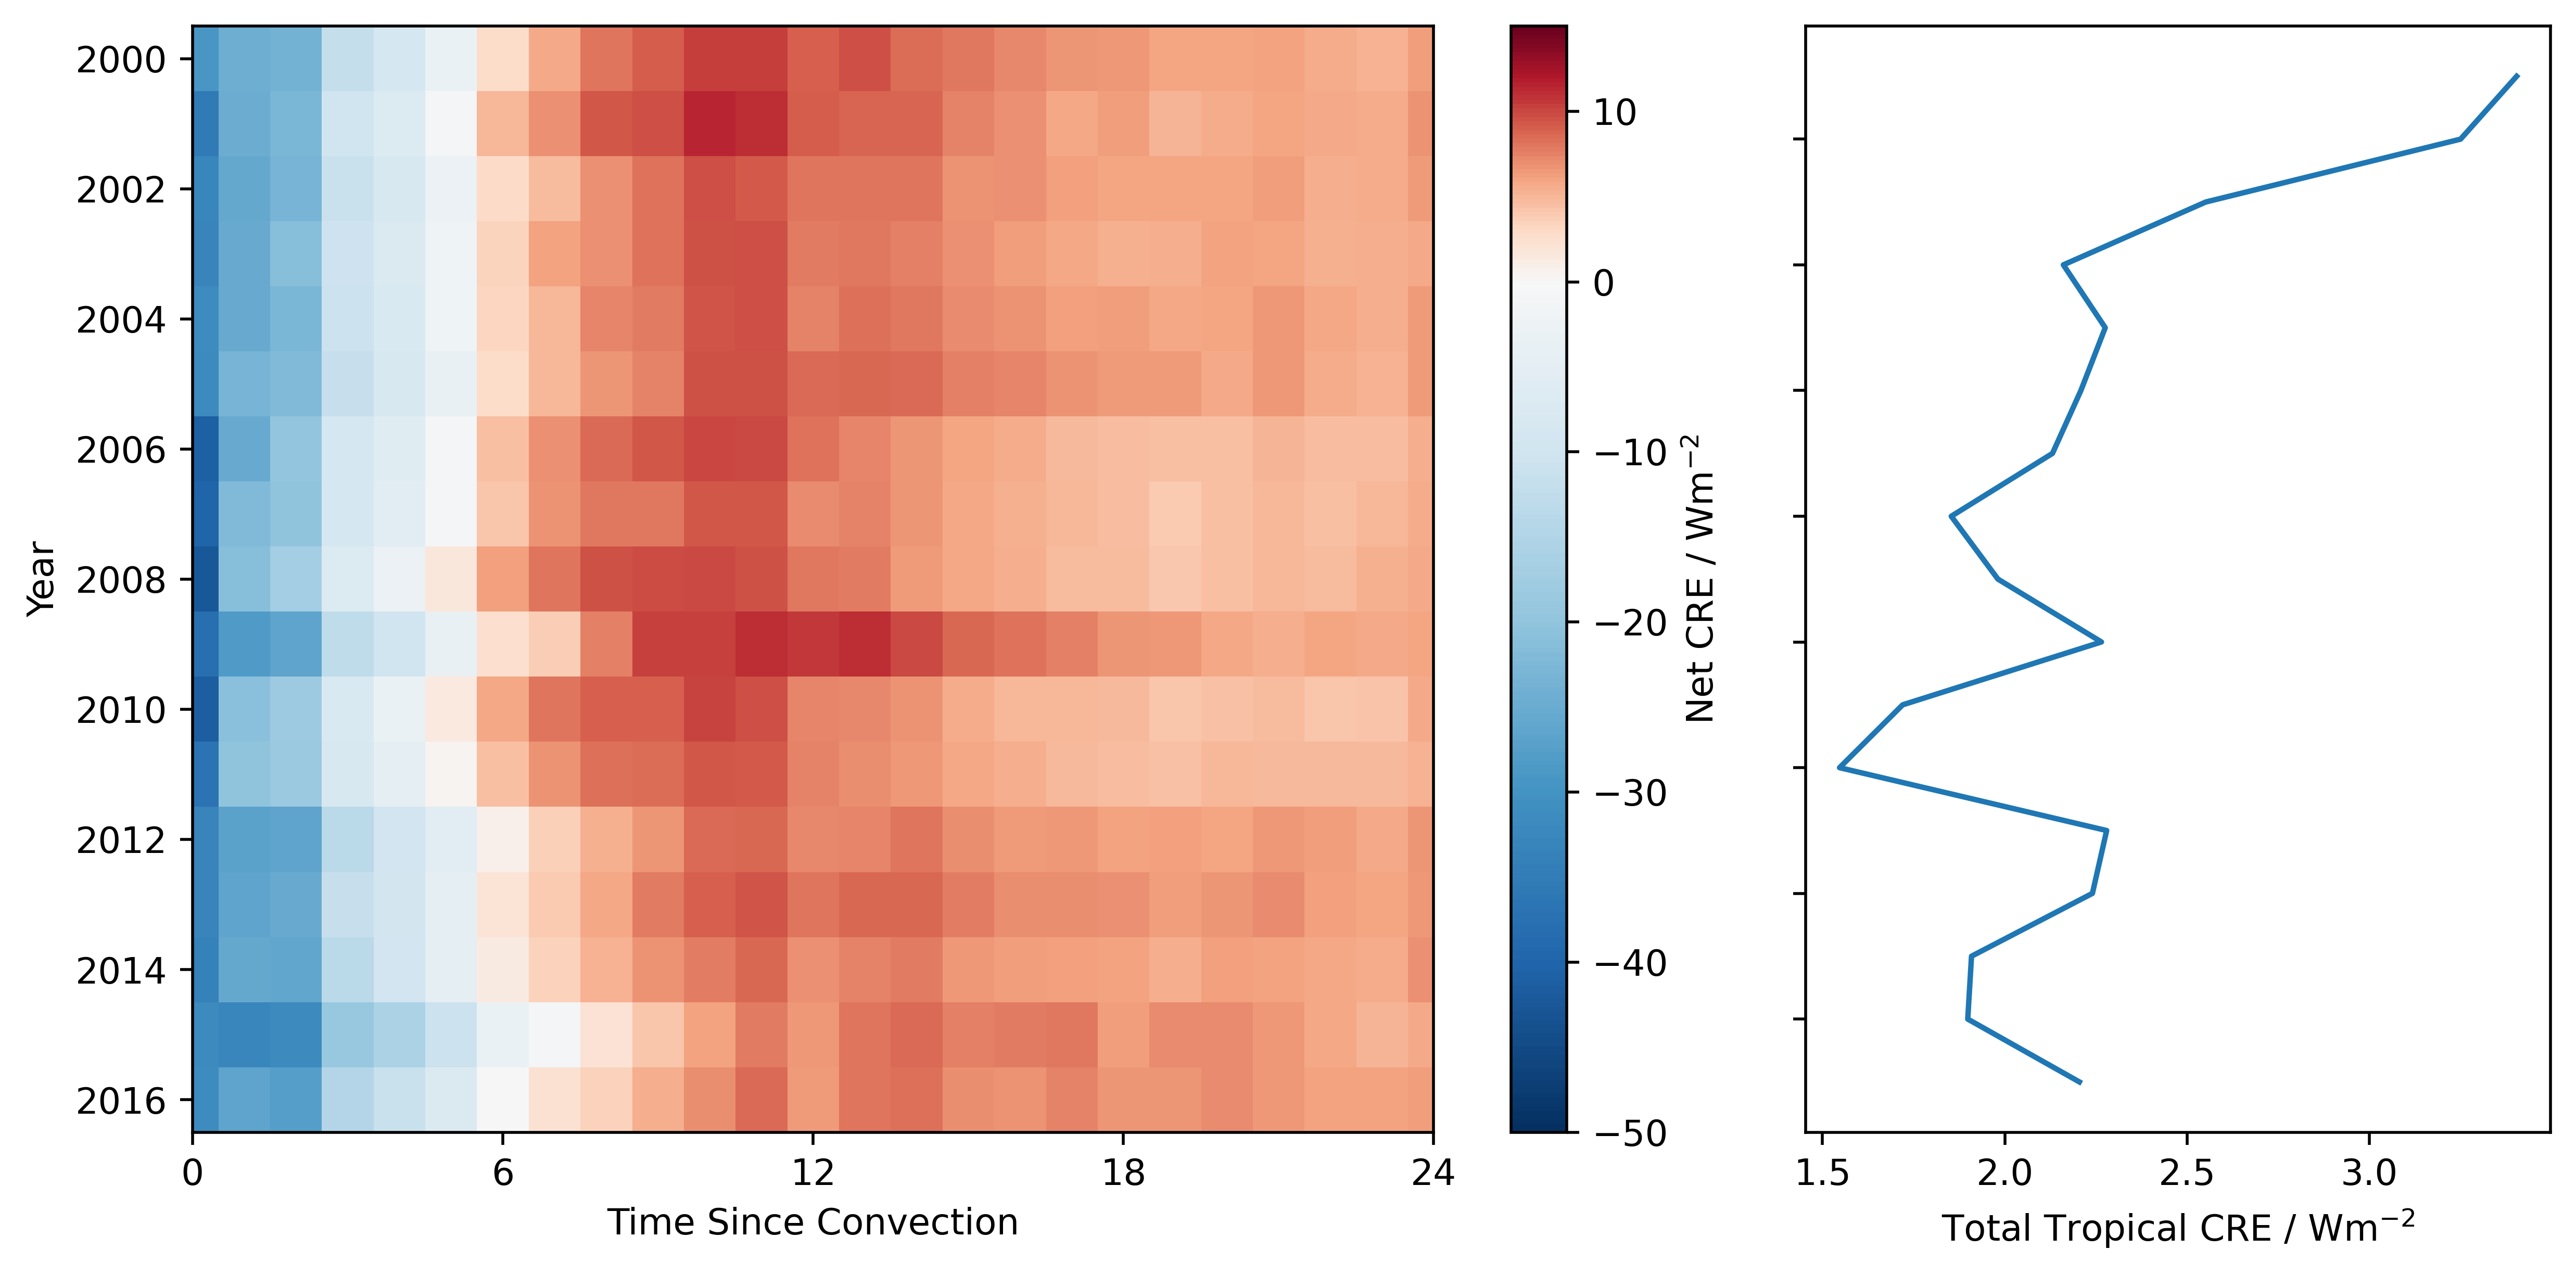

In [99]:
fig = plt.figure(figsize=(10,5),dpi=500)
gs = fig.add_gridspec(1, 3)

ax0 = plt.subplot(gs[0, 0:2])
im=ax0.imshow((LWSWCRE[:,0,:]+LWSWCRE[:,1,:]),aspect='auto',cmap='RdBu_r',norm=plt.cm.colors.TwoSlopeNorm(vmin=-50,vcenter=0,vmax=15))
ax0.set_xlim(0,24)
ax0.set_xticks(np.arange(0,30,6))
ax0.set_ylabel('Year')
ax0.set_yticks(np.arange(0,17,2))
ax0.set_yticklabels(np.arange(2000,2017,2))
plt.colorbar(im,ax=ax0,label='Net CRE / Wm$^{-2}$')
ax0.set_xlabel('Time Since Convection')

ax1 = plt.subplot(gs[0, 2])
ax1.plot(np.load('CRE_Plot_total_2000_2016.npy'),np.arange(17,0,-1),label='LW CRE')
ax1.set(yticklabels=[])
ax1.set_xlabel('Total Tropical CRE / Wm$^{-2}$')
#ax1.set_yticklabels(np.arange(2016,1999,2))
plt.tight_layout()
plt.savefig('ClimatologyPlots/CRE_00_16_SHORT_pluslifetime.pdf',dpi=700)


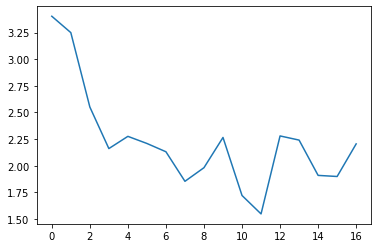

In [70]:
plt.plot(np.load('CRE_Plot_total_2000_2016.npy'))

In [58]:
np.save('CRE_Plot_total_2000_2016.npy',cre_evo)

In [ ]:
penso_net = np.nanmean(np.asarray(pmap)[:,0],axis=0) + np.nanmean(np.asarray(pmap)[:,1],axis=0)
nenso_net = np.nanmean(np.asarray(pmap)[:,2],axis=0) + np.nanmean(np.asarray(pmap)[:,3],axis=0)

penso_lw = np.nanmean(np.asarray(pmap)[:,0],axis=0)
nenso_lw = np.nanmean(np.asarray(pmap)[:,2],axis=0)

penso_sw = np.nanmean(np.asarray(pmap)[:,1],axis=0)
nenso_sw = np.nanmean(np.asarray(pmap)[:,3],axis=0)

fig = plt.figure(figsize=(8,4.75),dpi=500)
gs = fig.add_gridspec(1, 1)


#plt.xlim(0,20)

ax2 = fig.add_subplot(gs[0, 0])


ax2.plot(penso_net - nenso_net,linewidth=0.8,label='penso_net - nenso_net')
ax2.plot(penso_lw - nenso_lw,linewidth=0.8,label='penso_lw - nenso_lw')
ax2.plot(penso_sw - nenso_sw,linewidth=0.8,label='penso_sw - nenso_sw')
ax2.set_ylabel('$\Delta$CRE')
ax2.set_xlabel('TSC / hrs')
ax2.legend()
plt.xlim(0,120)
plt.axhline(0,color='k')

In [46]:
LWAVG = np.zeros((16,499))
SWAVG = np.zeros((16,499))
for i in range(0,16):
    LWAVG[i] = pmap[i][0]
    SWAVG[i] = pmap[i][1]

MEANLW = np.nanmean(LWAVG,axis=0)
MEANSW = np.nanmean(SWAVG,axis=0)

In [86]:
pmap

[3.4020553224831005,
 3.2505533466124916,
 2.5505135830295416,
 2.160188212641181,
 2.2775408135415773,
 2.2107827017639394,
 2.135880709631593,
 1.8569744811784474,
 1.9918335093586066,
 None,
 1.725474731281082,
 1.5489672130341603,
 2.281613867552551,
 2.2409864521852825,
 1.910639845517835,
 1.896571917721559,
 None]

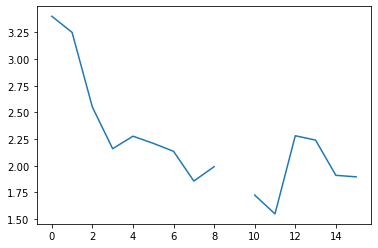

In [85]:
plt.plot(pmap)

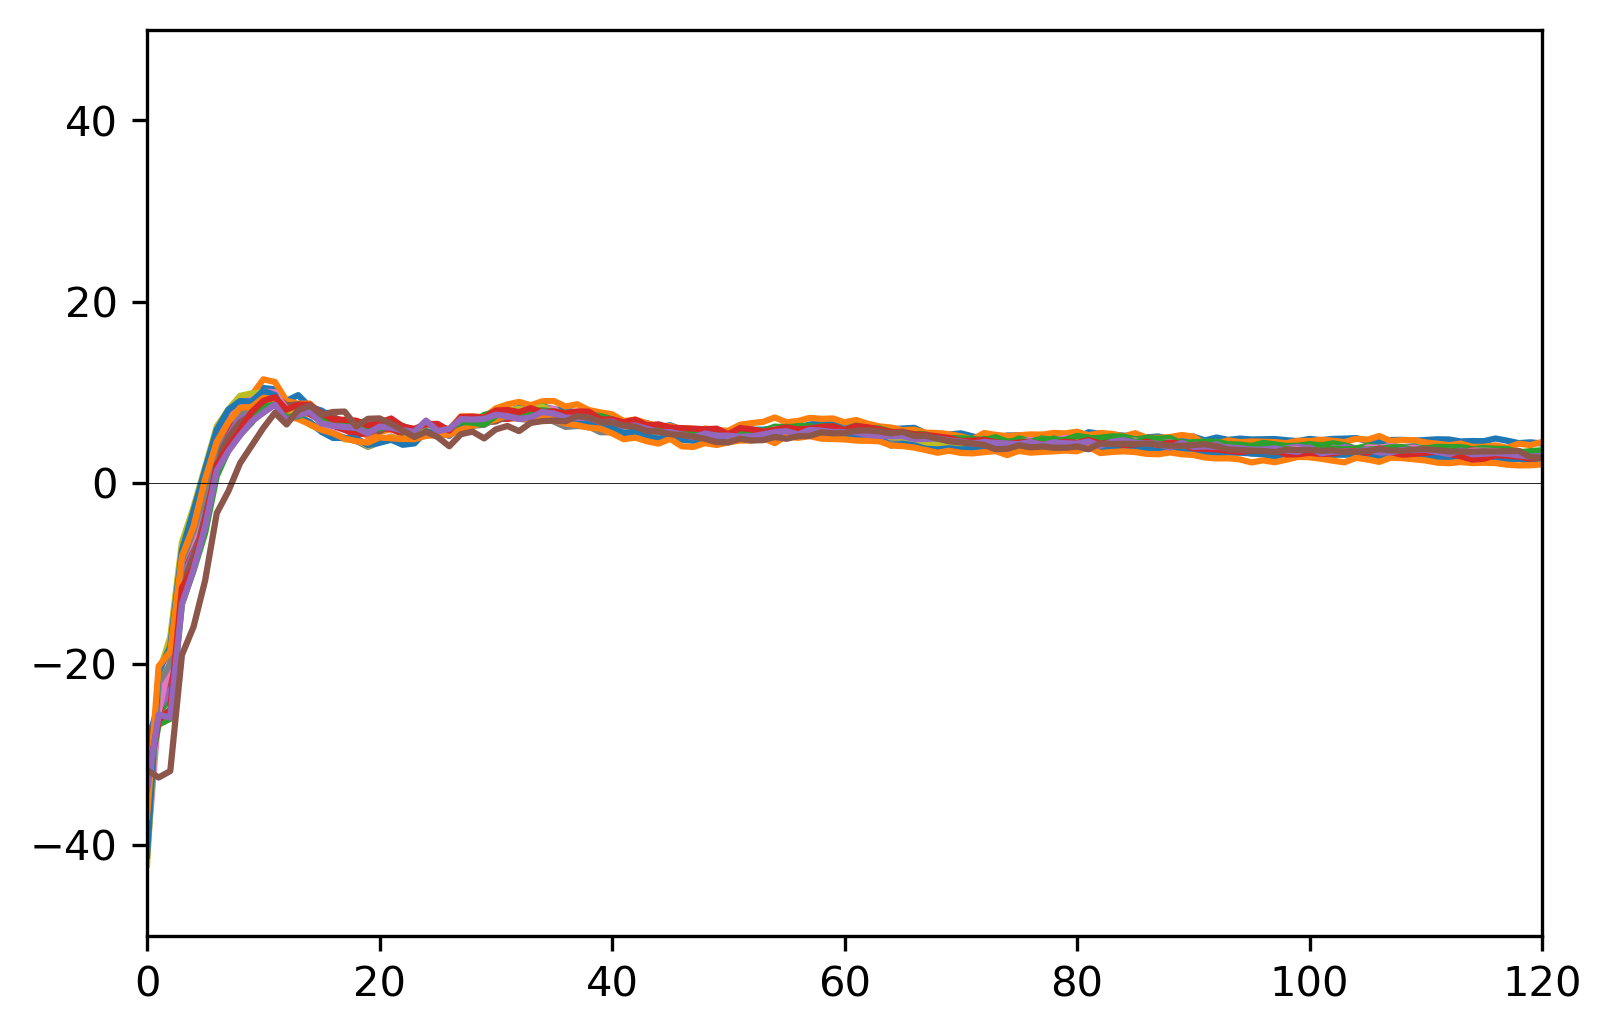

In [62]:
#plt.plot(MEANSW+MEANLW)
plt.figure(dpi=300)
for i in range(16):
    plt.plot((LWAVG[i]+SWAVG[i]))
plt.xlim(0,120)
plt.ylim(-50,50)
plt.axhline(0,color='k',linewidth=0.2)

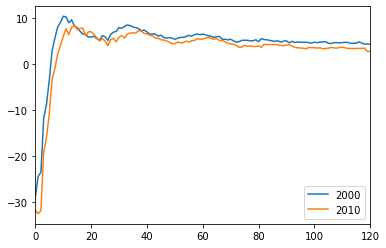

In [24]:
plt.plot(pmap[0][0] + pmap[0][1],label='2000')
plt.plot(pmap[15][0] + pmap[15][1],label='2010')
plt.xlim(0,120)
plt.legend()

In [ ]:
LW_AVERAGE_penso,SW_AVERAGE_penso,LW_AVERAGE_nenso = pmap

In [ ]:


plt.plot(results[0]+results[1],label='pENSO')
plt.plot(results[2]+results[3],label='nENSO')

plt.xlim(0,120)
#plt.ylim(-100,100)
#plt.ylim(-200,-100)
plt.legend()

In [ ]:
reg

In [ ]:
def slope(x):
    sl = stats.linregress(x.time.astype(float),x[dict(paired_points=0)]).slope
    return xr.DataArray(sl)

slope = np.zeros((60,360))
intercept = np.zeros((60,360))
rval = np.zeros((60,360))
for i in range(0,60,1):
    for j in range(0,360,1):
        x = dcc_total[:,i,j]
        y = np.arange(0,len(x))
        reg = stats.linregress(y,x)
        slope[i,j] = reg.slope
        intercept[i,j] = reg.intercept
        rval[i,j] = reg.rvalue
        if j % 10 == 0:
            print(j)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


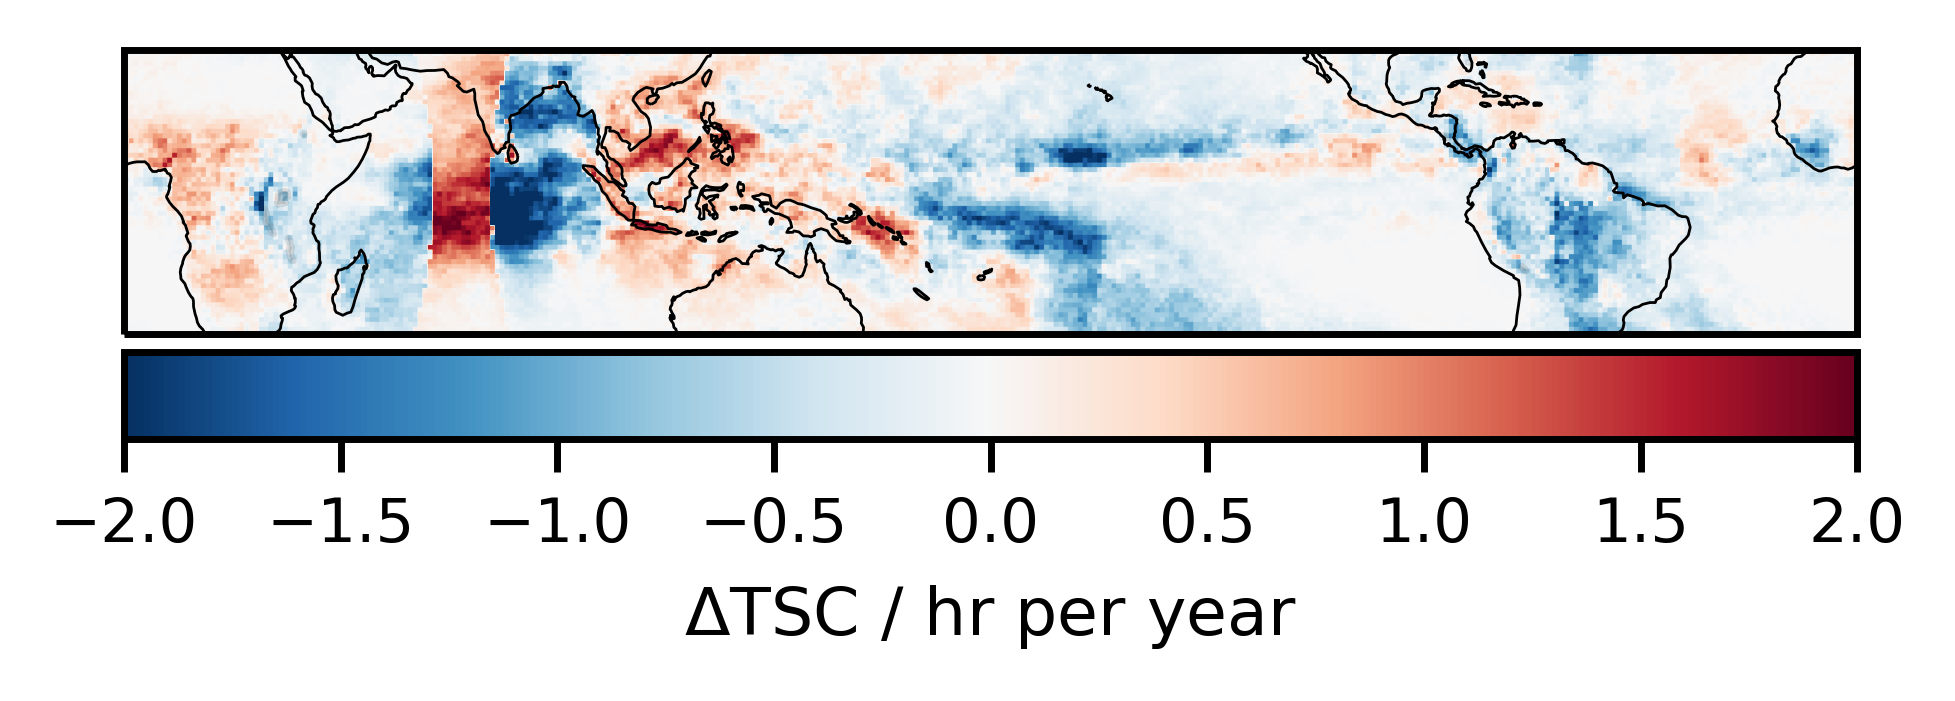

In [ ]:
sns.set_context('paper')
img_extent = (0, 360, -30, 30)
fig = plt.figure(figsize=(4,4),dpi=500)


ax0 = fig.add_subplot( projection=ccrs.PlateCarree(central_longitude=180))
ax0.set_extent([0,180,-29.5,29.5],ccrs.PlateCarree(central_longitude=180))
ax0.coastlines(resolution='auto', color='k',linewidth=0.4)
ax0.add_feature(cfeature.LAKES, alpha=0.1,color='k')
im=ax0.imshow(slope,origin='lower',cmap='RdBu_r',vmin=-2,vmax=2,transform=ccrs.PlateCarree(),extent=img_extent)
plt.colorbar(im,ax=ax0,orientation='horizontal',label='$\Delta$TSC / hr per year',pad=0.01)
plt.tight_layout()
#plt.savefig('/disk1/Users/gah20/ClimatologyPlots/tsc_slope.png')

In [ ]:
tsc_total = np.zeros((2017-1984,60,360))
dcc_total = np.zeros((2017-1984,60,360))
land_total = np.zeros((2017-1984,60,360))
ocean_total = np.zeros((2017-1984,60,360))

for i in range(1984,2017,1):
    tsc = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(i)+'/TSC*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
    tsc_total[i-1984] = np.nanmean(tsc,axis=0)
    dcc = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['DCC'][:,60:120]
    dcc_total[i-1984] = np.nansum(dcc/dcc,axis=0)
    landocean = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(i)+'/TSC*.nc',combine='nested',concat_dim='time')['ConvOrigin'][:,2:62]
    land_total[i-1984] = np.nansum(np.where(tsc<120,np.where(landocean>0,1,0),0),axis=0)
    ocean_total[i-1984] = np.nansum(np.where(tsc<120,np.where(landocean<0,1,0),0),axis=0)
    print(i)


1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


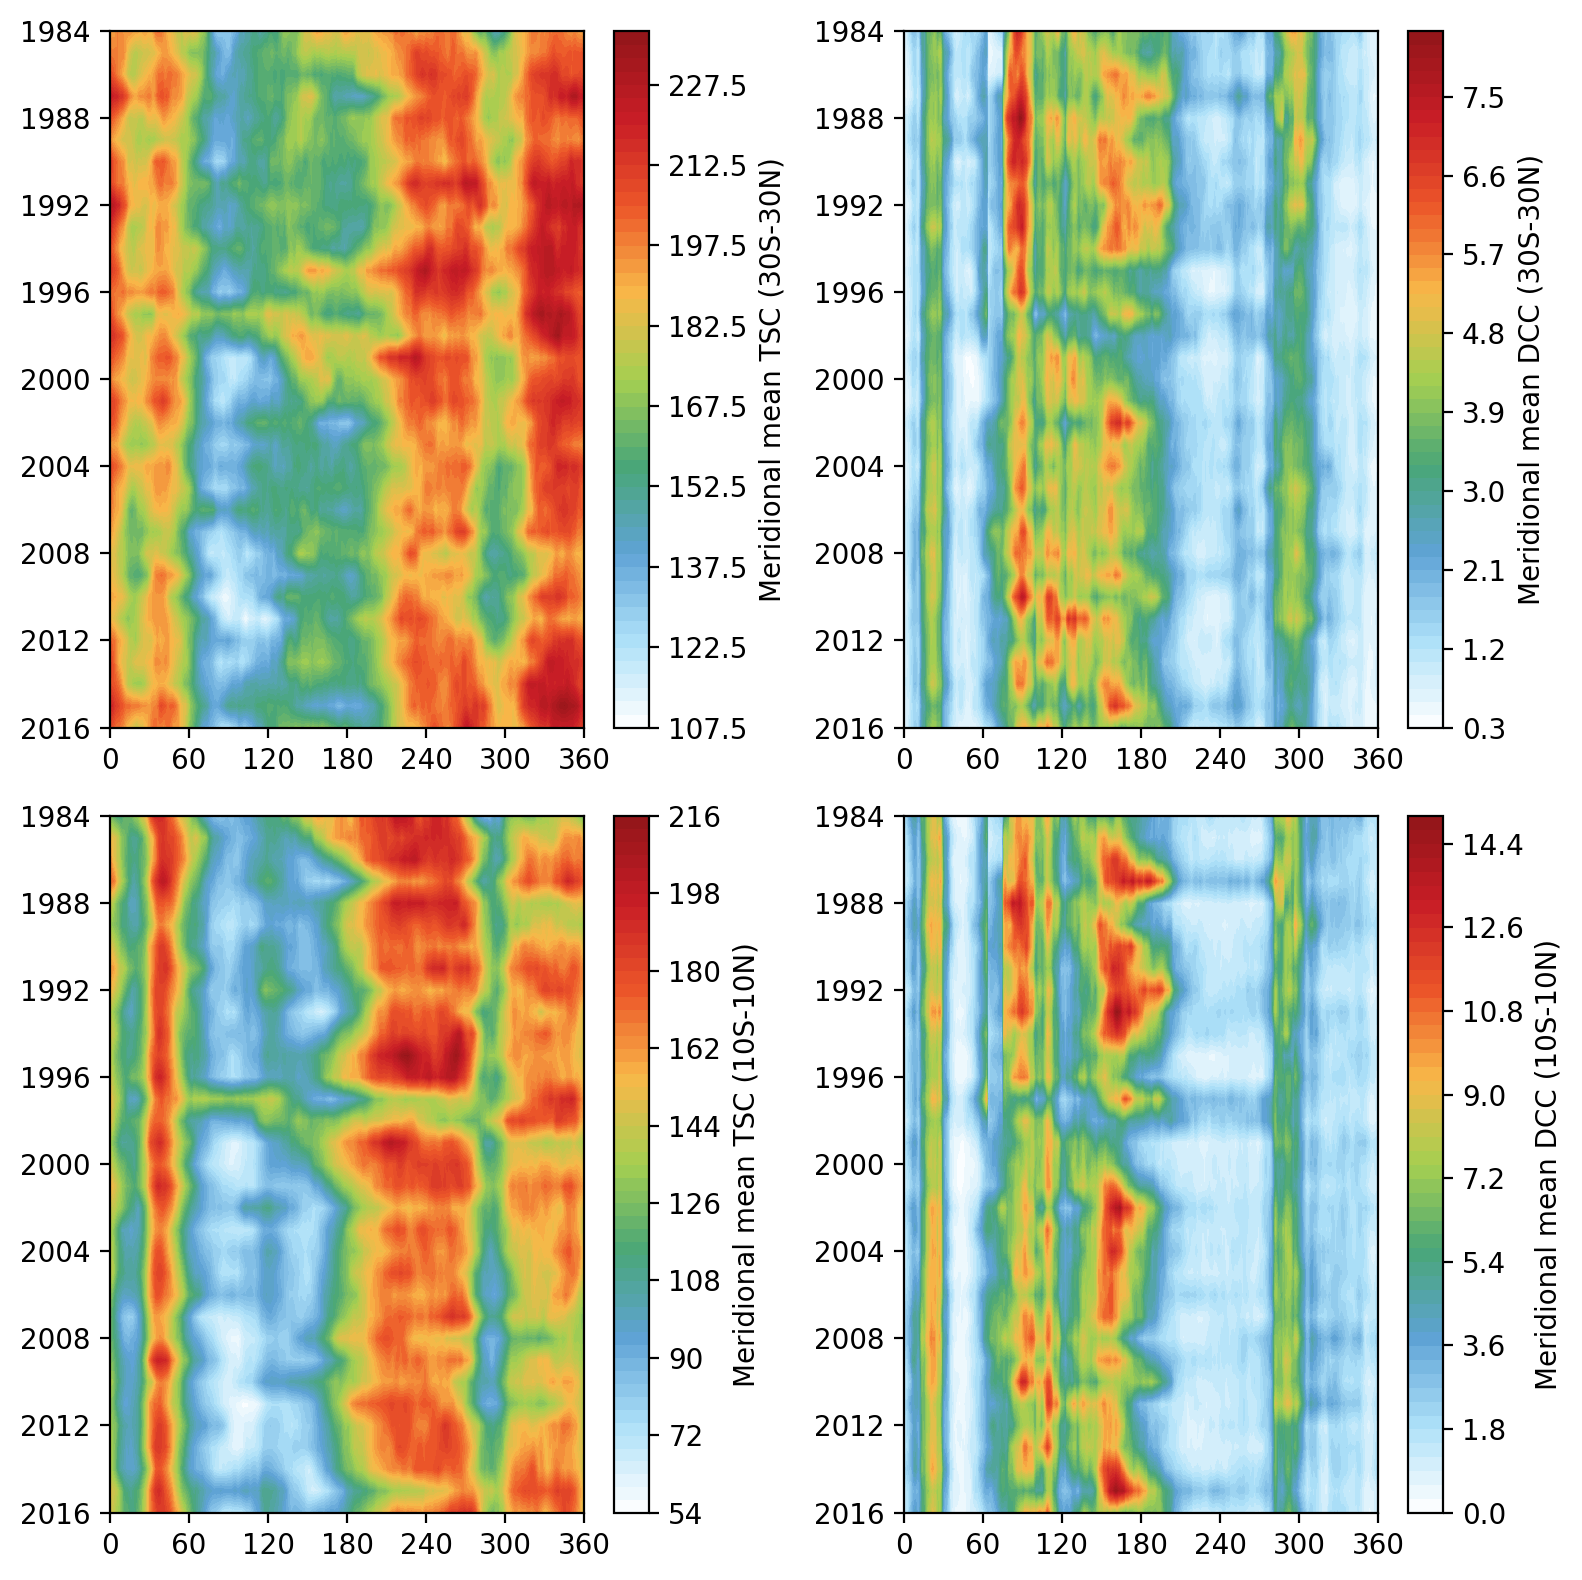

In [130]:
fig = plt.figure(dpi=200,figsize=(8,8))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

im1=ax0.contourf(np.flip(np.nanmedian(tsc_total_full[:,:],axis=1),axis=0),cmap=cmap,levels=55)
ax0.set_ylim(0,32)
ax0.set_yticks(np.arange(0,33,4))
ax0.set_yticklabels(np.arange(2016,1983,-4))
ax0.set_xticks(np.arange(0,420,60))
ax0.set_xticklabels(np.arange(0,420,60))
plt.colorbar(im1,ax=ax0,label='Meridional mean TSC (30S-30N)')

im2 = ax1.contourf(np.flip(np.nanmean(dcc_total[:,:],axis=1),axis=0)*200,cmap=cmap,levels=55)
ax1.set_ylim(0,32)
ax1.set_yticks(np.arange(0,33,4))
ax1.set_yticklabels(np.arange(2016,1983,-4))
ax1.set_xticks(np.arange(0,420,60))
ax1.set_xticklabels(np.arange(0,420,60))
plt.colorbar(im2,ax=ax1,label='Meridional mean DCC (30S-30N)')

im3=ax2.contourf(np.flip(np.nanmedian(tsc_total_full[:,20:40],axis=1),axis=0),cmap=cmap,levels=55)
ax2.set_ylim(0,32)
ax2.set_yticks(np.arange(0,33,4))
ax2.set_yticklabels(np.arange(2016,1983,-4))
ax2.set_xticks(np.arange(0,420,60))
ax2.set_xticklabels(np.arange(0,420,60))
plt.colorbar(im3,ax=ax2,label='Meridional mean TSC (10S-10N)')

im4 = ax3.contourf(np.flip(np.nanmean(dcc_total[:,20:40],axis=1),axis=0)*200,cmap=cmap,levels=55)
ax3.set_ylim(0,32)
ax3.set_yticks(np.arange(0,33,4))
ax3.set_yticklabels(np.arange(2016,1983,-4))
ax3.set_xticks(np.arange(0,420,60))
ax3.set_xticklabels(np.arange(0,420,60))
plt.colorbar(im4,ax=ax3,label='Meridional mean DCC (10S-10N)')

plt.tight_layout()
plt.savefig('/disk1/Users/gah20/ClimatologyPlots/tsc_dcc_meridionalmean.png')

In [263]:
dcc_total = np.zeros((2017-1984, 60, 360))
dcc_total[:] = np.nan
#tsc_total = np.zeros((2017-1984, 60, 360))
#tsc_total[:] = np.nan
tsc_total_full = np.zeros((2017-1984, 60, 360))
tsc_total_full[:] = np.nan

count_total = np.zeros((2017-1984))
for i in range (1984,2017,1):


    convdata = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['DCC'][:,60:120]
    #tscdata = xr.open_mfdataset('/disk1/Users/gah20/TSCnew/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]
    tscdatafull = xr.open_mfdataset('/disk1/Users/gah20/TSC_FULL/'+str(i)+'/*.nc',combine='nested',concat_dim='time')['TSC'][:,2:62]

    dcc = np.nansum(convdata/convdata,axis=(0))
    #tsc = np.nanmean(tscdata,axis=(0))
    tscfull = np.nanmean(tscdatafull,axis=(0))

    
    dcc_total[i-1984] = dcc
    #tsc_total[i-1984] = tsc
    tsc_total_full[i-1984] = tscfull

    count_total[i-1984] = len(convdata)
    print(i)

1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [75]:
dccyearly = []
for j in range(1985,2017,1):
    dccdata = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(j)+'/*.nc',combine='nested',concat_dim='time',cmap=cmap)['DCC'][:,60:120]
    dcc = dccdata/dccdata
    dccyearly.append(np.nansum(dcc))

NameError: name 'cmap' is not defined

In [33]:
meantotal = np.nanmean(np.flip(np.nanmean(tsc_total_full[:,:],axis=2),axis=0),axis=0)

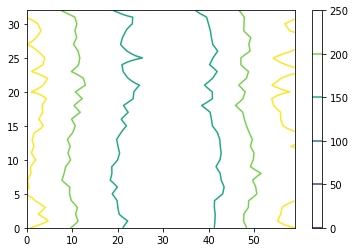

In [69]:
plt.contour(np.flip(np.nanmean(tsc_total_full[:,:],axis=2),axis=0),levels=np.arange(0,300,50))
plt.colorbar()

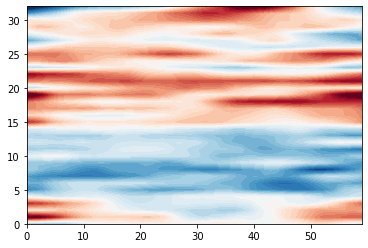

In [56]:
plt.contourf(np.flip(np.nanmean(tsc_total_full[:,:],axis=2),axis=0) - (np.nanmean(np.flip(np.nanmean(tsc_total_full[:,:],axis=2),axis=0),axis=0)),vmax=20,vmin=-20,cmap='RdBu_r',levels=50)

TypeError: Invalid shape (60,) for image data

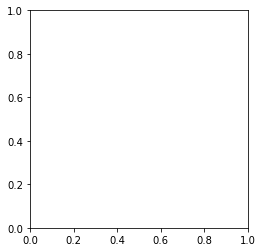

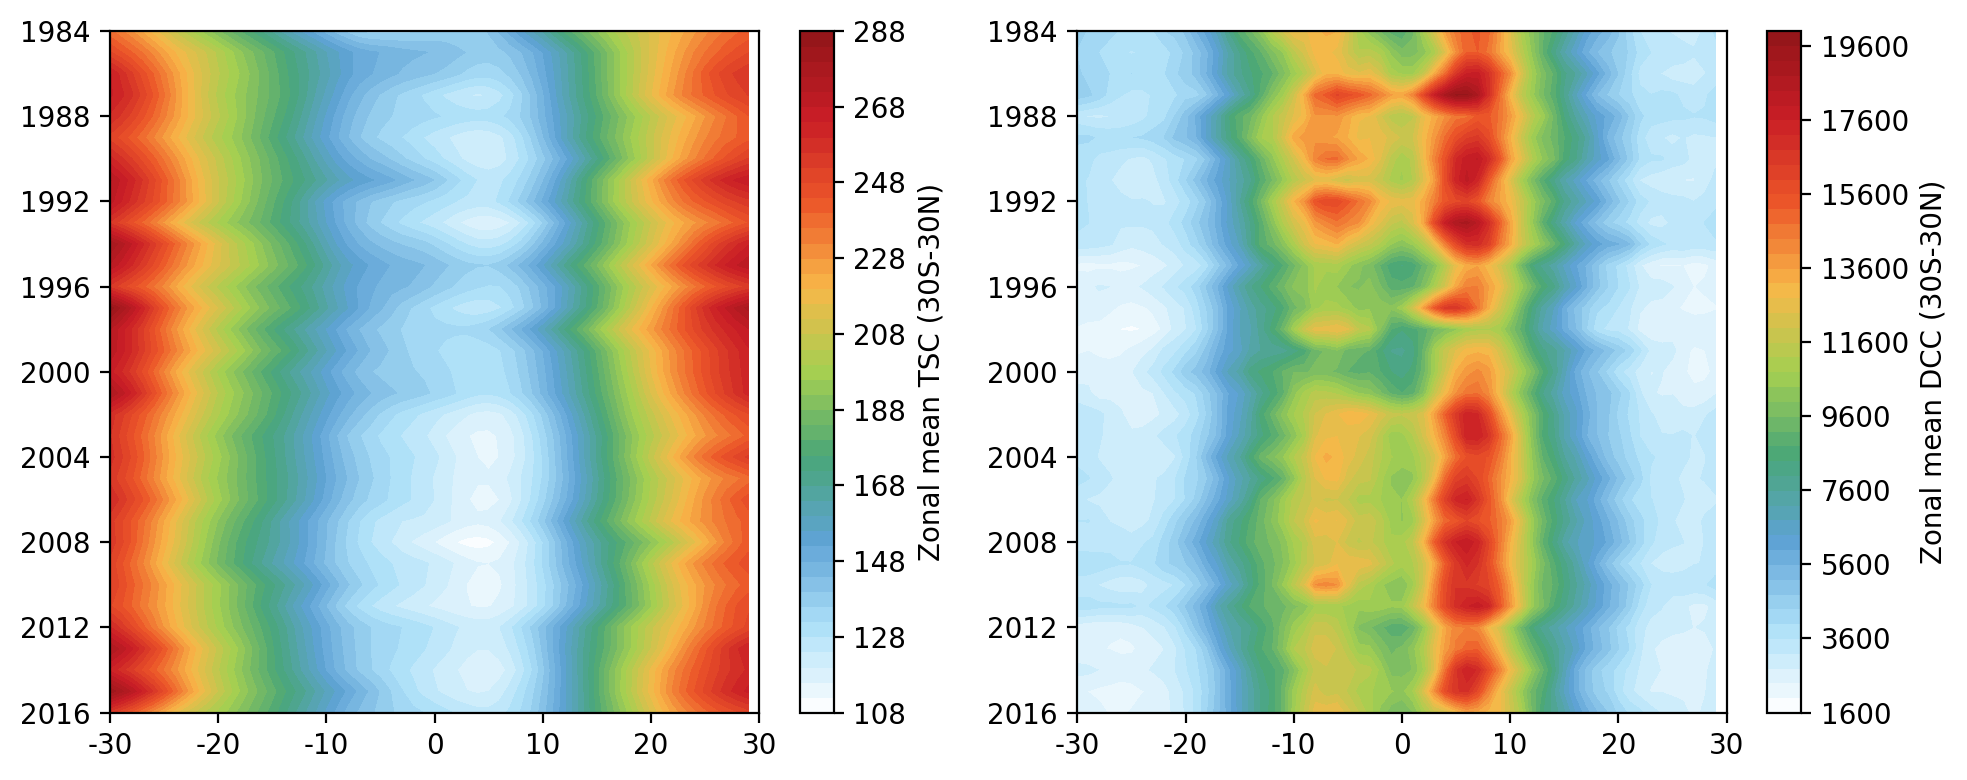

In [267]:
fig = plt.figure(dpi=200,figsize=(10,4))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


im1=ax0.contourf(np.flip(np.nanmean(tsc_total_full[:,:],axis=2),axis=0),cmap=cmap,levels=55)
ax0.set_ylim(0,32)
ax0.set_yticks(np.arange(0,33,4))
ax0.set_yticklabels(np.arange(2016,1983,-4))
ax0.set_xticks(np.arange(0,70,10))
ax0.set_xticklabels(np.arange(-30,40,10))
ax0.plot(((np.asarray(topmean[:])+200 - 360))*0.25,np.arange(1984,2017,1))
ax0.set_xlim(0,60)
plt.colorbar(im1,ax=ax0,label='Zonal mean TSC (30S-30N)')

im2 = ax1.contourf(np.flip(np.nanmean(dcc_total[:,:],axis=2),axis=0)*200,cmap=cmap,levels=55)
ax1.set_ylim(0,32)
ax1.set_yticks(np.arange(0,33,4))
ax1.set_yticklabels(np.arange(2016,1983,-4))
ax1.set_xticks(np.arange(0,70,10))
ax1.set_xticklabels(np.arange(-30,40,10))
plt.colorbar(im2,ax=ax1,label='Zonal mean DCC (30S-30N)')

plt.tight_layout()

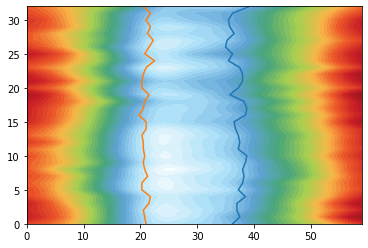

In [296]:
plt.contourf(np.flip(np.flip(np.nanmean(tsc_total_full[:,:],axis=2),axis=0),axis=1)*200,cmap=cmap,levels=55)
plt.plot(np.flip(((np.asarray(topmean[:])+200 - 360))*0.25,axis=0)+30,np.arange(0,33,1))
plt.plot(np.flip(((np.asarray(botmean[:])+200 - 360))*0.25,axis=0)+30,np.arange(0,33,1))

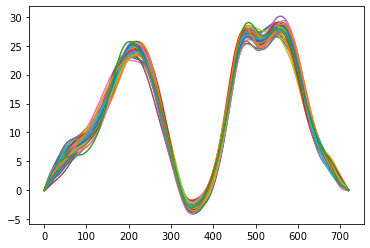

In [304]:
posvwindmean = []
negvwindmean = []
botmean = []
topmean = []
zonalwindtotal = []
sh = []
nh = []
yearlywind = np.zeros((33,721))
totalwinds = np.zeros((33,721,1440))
for i in range(1984,2017,1):
    #uwind = np.load('/disk1/Users/gah20/Wind/U_'+str(i)+'_windmean.npy')
    vwind = np.load('/disk1/Users/gah20/Wind/V_'+str(i)+'_windmean.npy')
    uwind = np.load('/disk1/Users/gah20/Wind/U_'+str(i)+'_windmean.npy')

    wind = np.sqrt(uwind**2 + vwind**2)

    posvwindmean.append(np.nanmedian(np.where(vwind>0,vwind,np.nan)))
    negvwindmean.append(np.nanmedian(np.where(vwind<0,vwind,np.nan)))

    zonalwindtotal.append(np.nanmean(wind,axis=1))
    zonalwinds = np.nanmean(uwind,axis=1)
    top=np.where(zonalwinds[200:500]<0)[0][-1]
    bot = np.where(zonalwinds[200:500]<0)[0][0]
    
    botmean.append(bot)
    topmean.append(top)
    
    peaks = sig.find_peaks(np.nanmean(uwind[100:600],axis=1))[0]
    sh.append(peaks[0])
    nh.append(peaks[-2])
    yearlywind[i-1984] = np.nanmean(uwind,axis=1)
    totalwinds[i-1984] = uwind
    plt.plot(np.nanmean(uwind,axis=1))
    
plt.show()



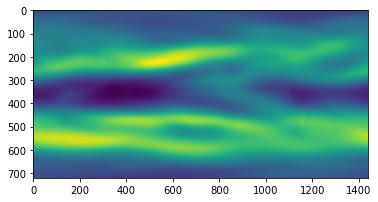

In [349]:
plt.imshow(totalwinds[15,:])
#plt.plot(botmean)